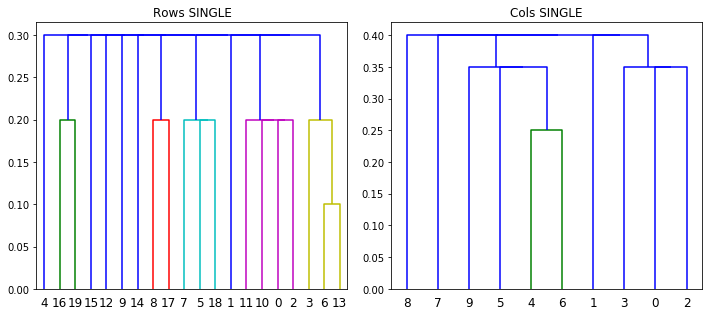

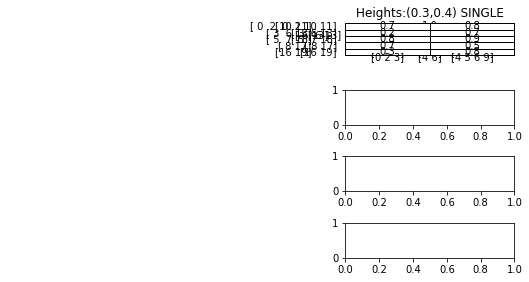

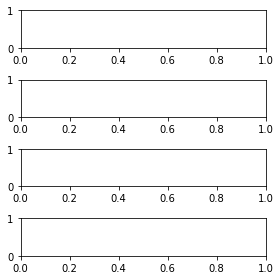

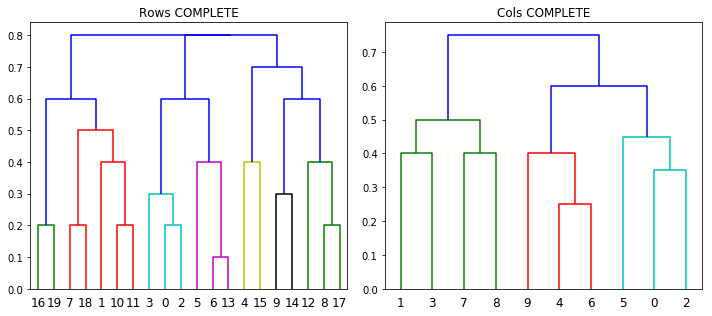

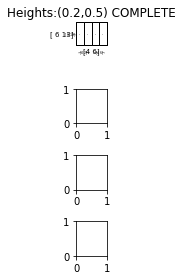

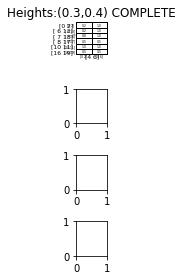

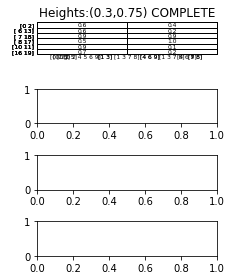

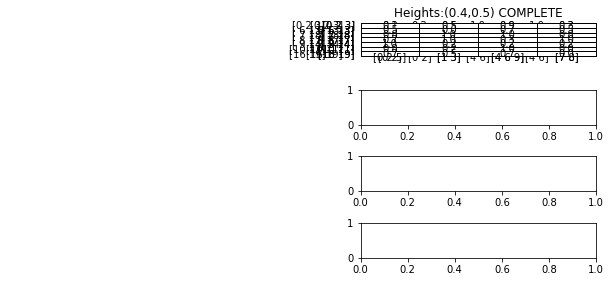

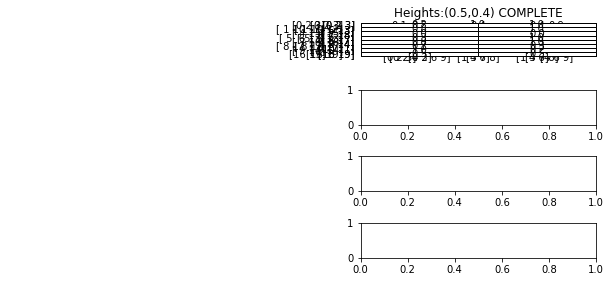

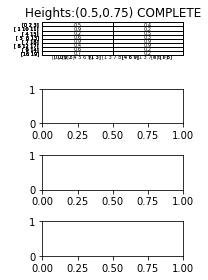

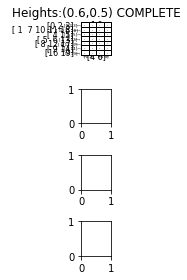

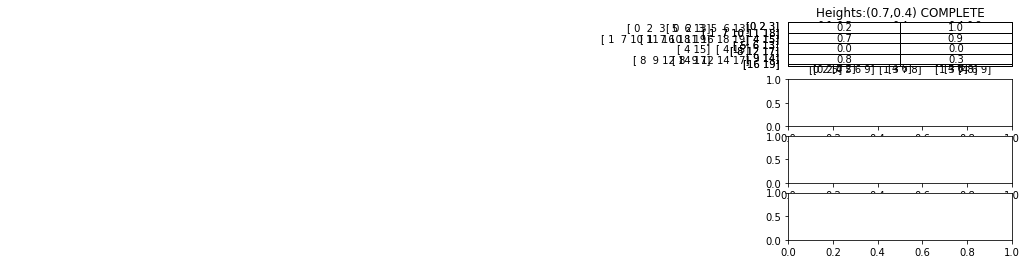

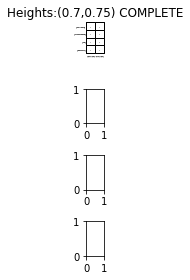

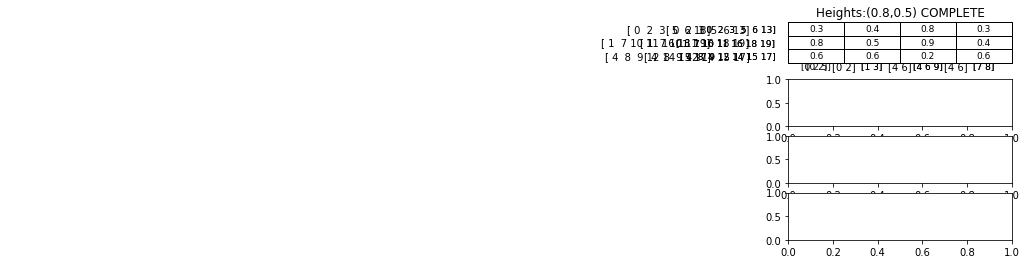

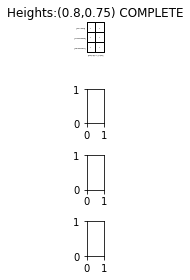

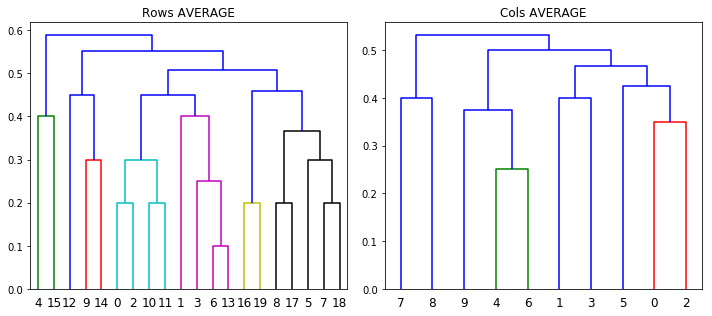

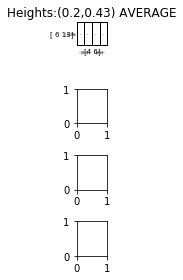

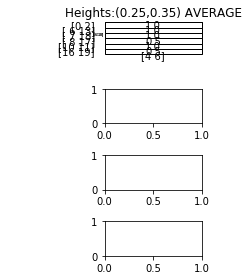

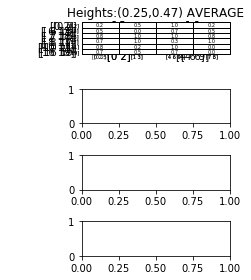

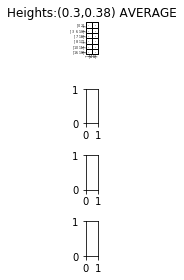

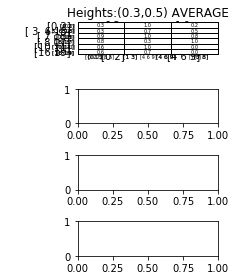

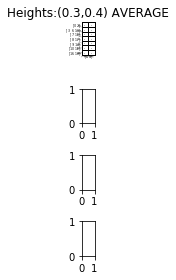

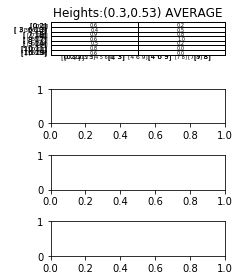

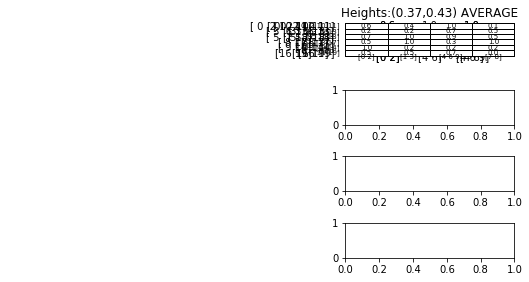

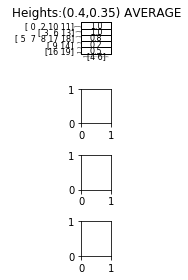

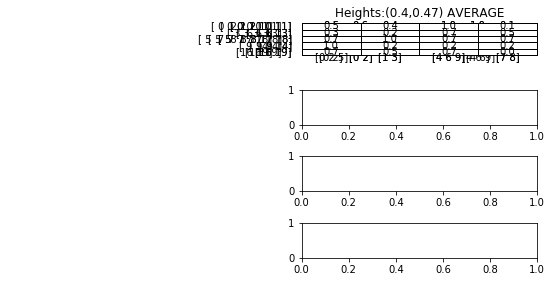

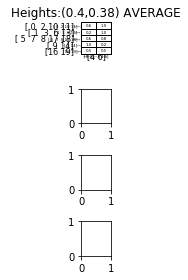

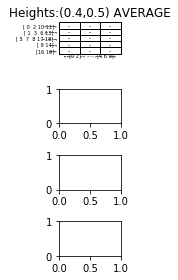

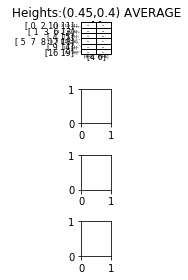

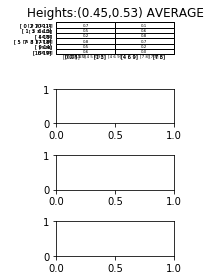

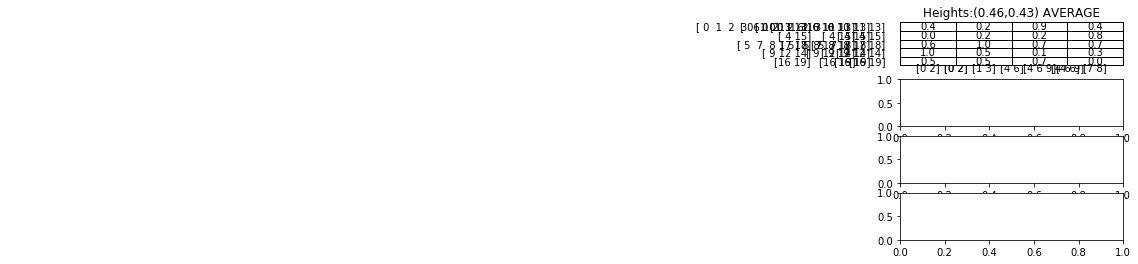

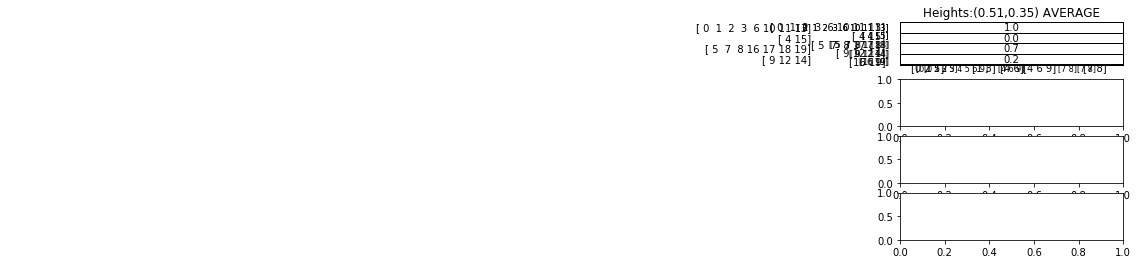

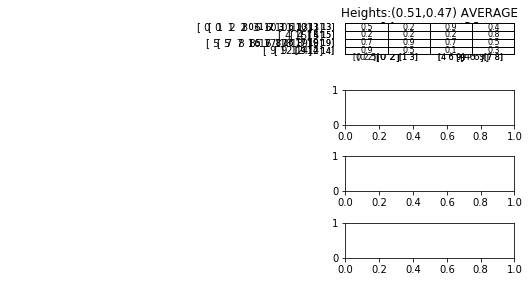

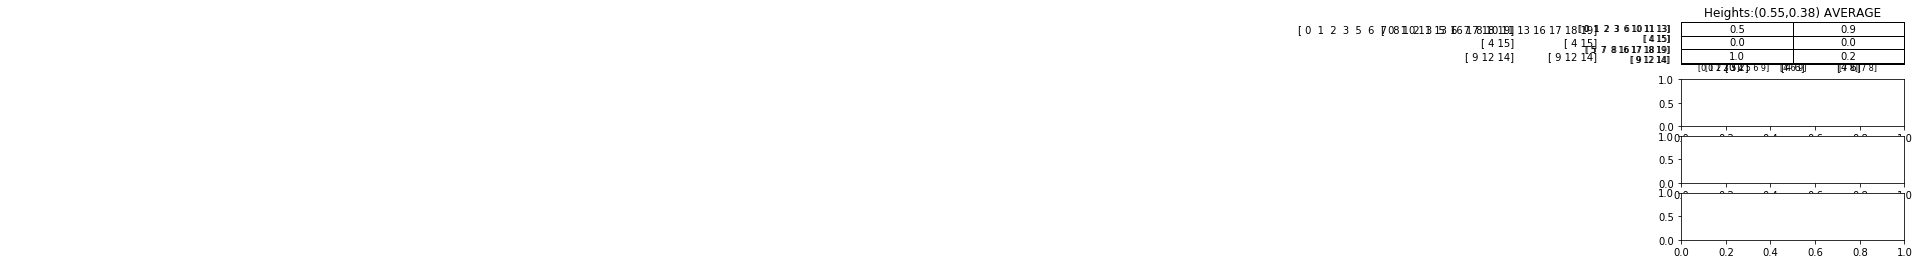

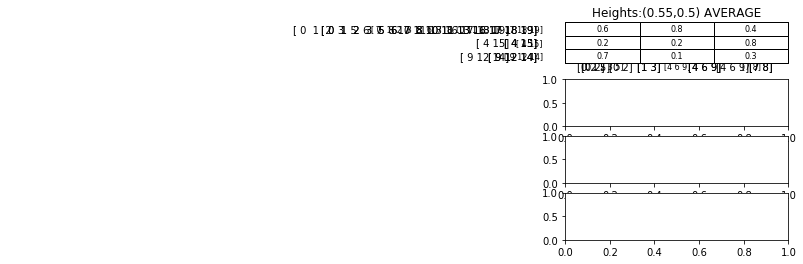

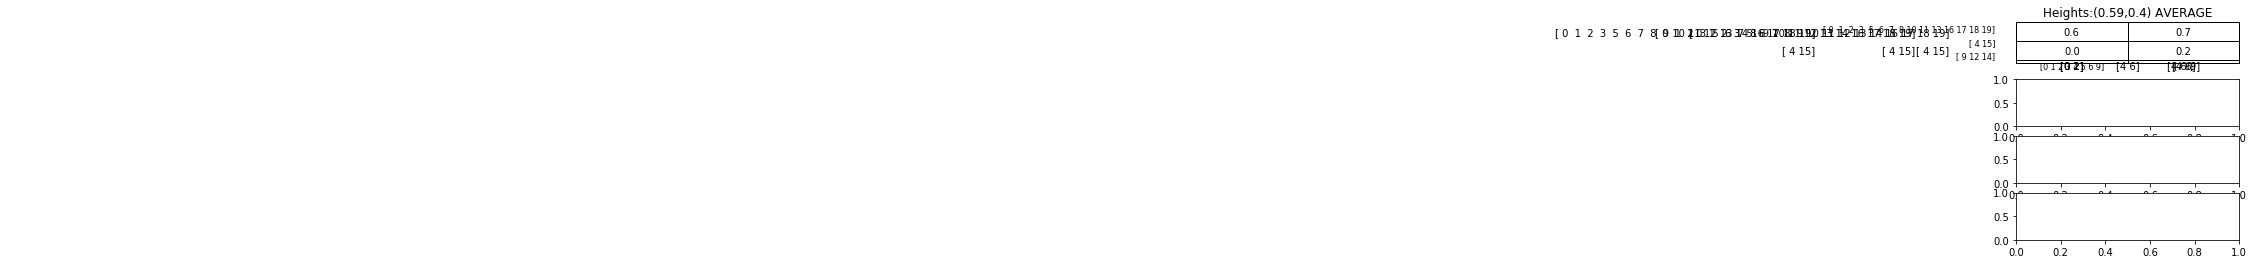

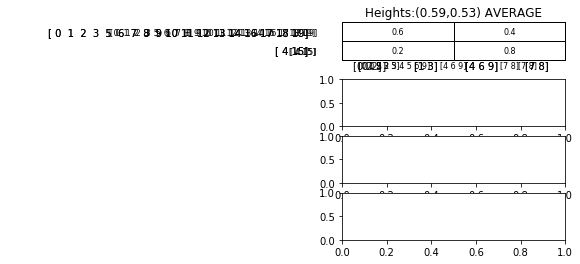

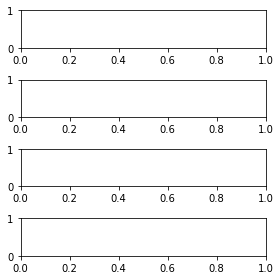

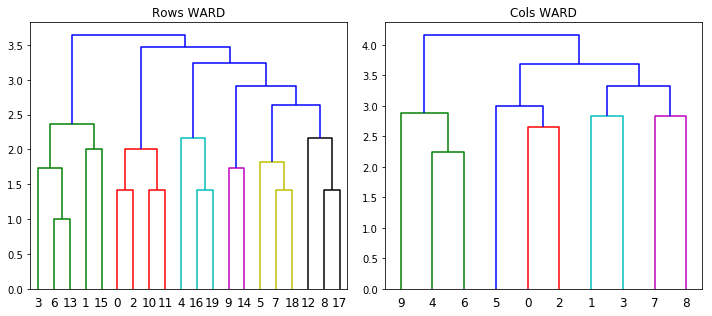

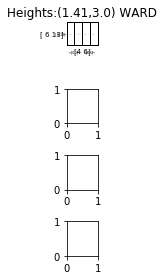

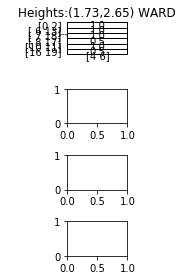

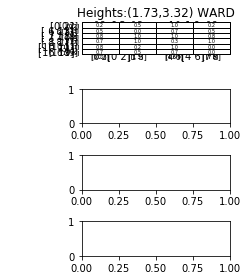

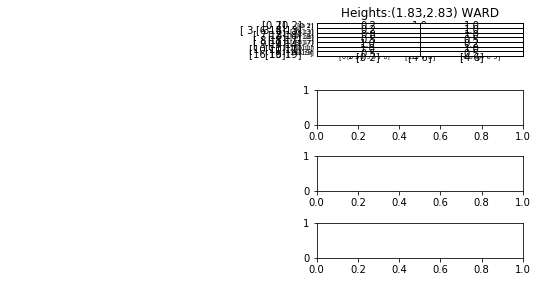

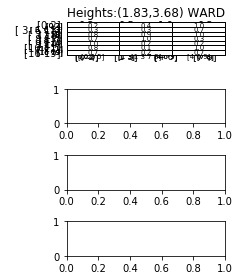

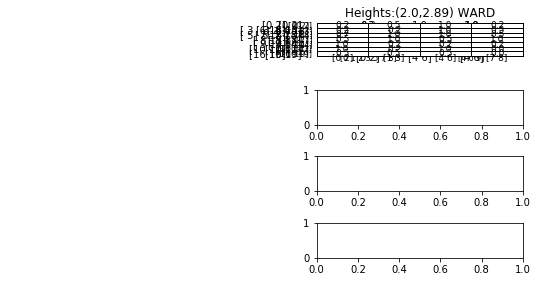

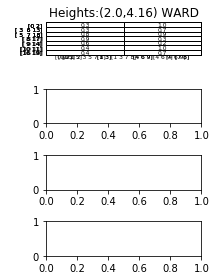

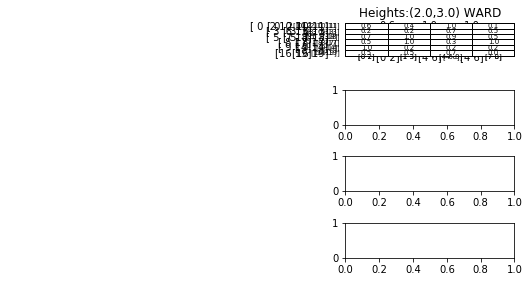

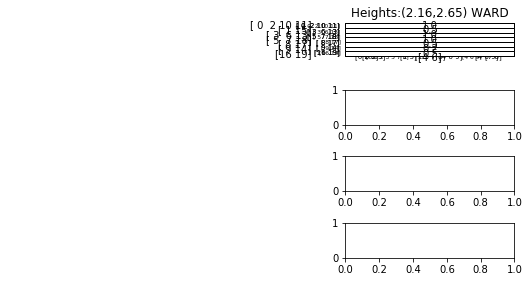

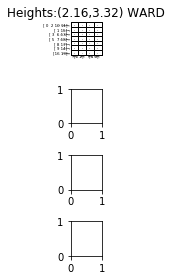

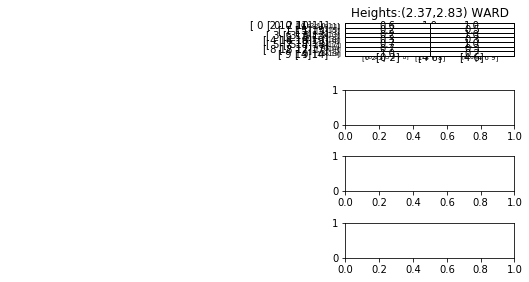

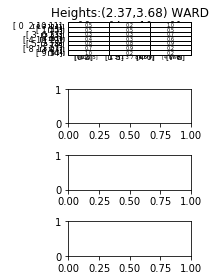

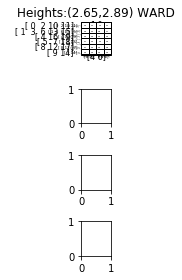

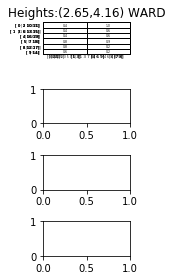

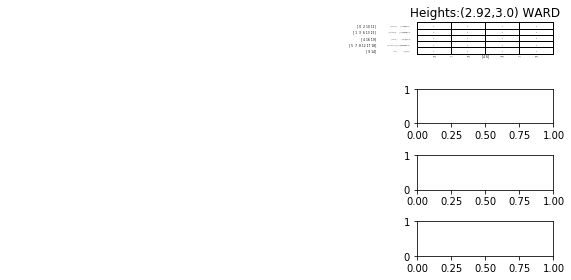

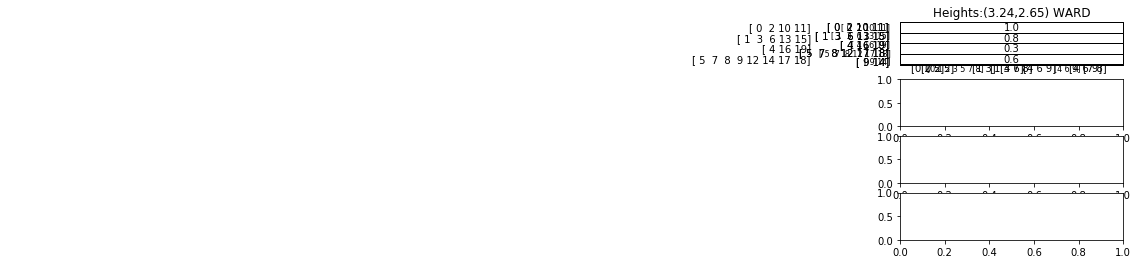

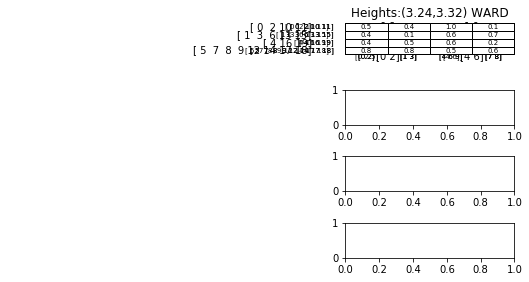

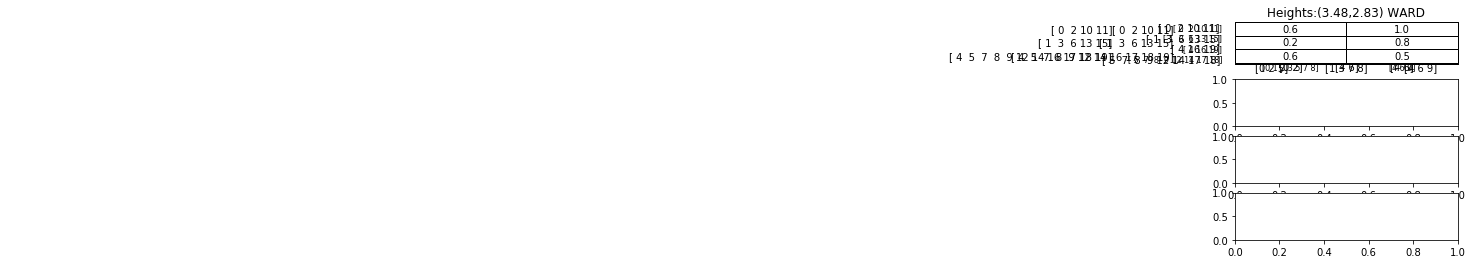

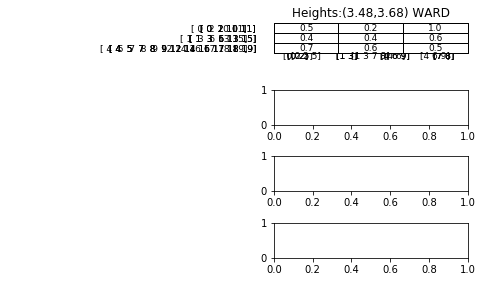

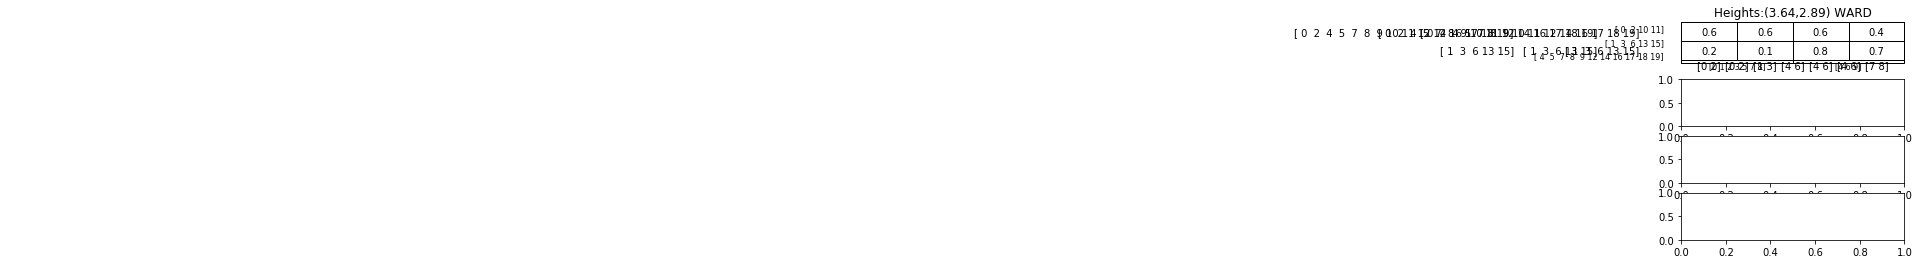

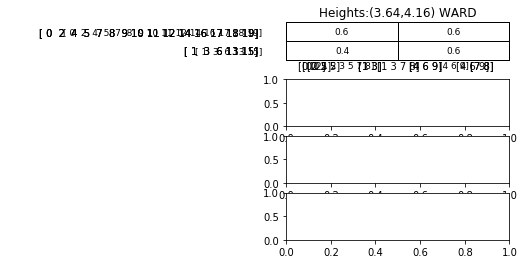

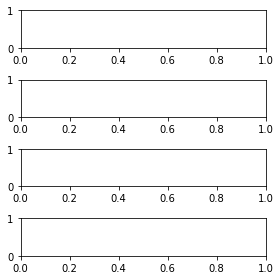

In [27]:
from scipy.cluster.hierarchy import *
from matplotlib.table import Table
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

methods = {'single':'hamming',
           'complete':'hamming',
           'average':'hamming',
           'ward':'euclidean' }


if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('imagesMR'):
    os.makedirs('imagesMR')

    
    
def checkerboard_plot(ary, ax, title="hello",
                      cell_colors=('white', 'white'),
                      font_colors=('black', 'black'),
                      fmt='%.1f',
                      row_labels=None,
                      col_labels=None,
                      fontsize=None):

    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    n_rows, n_cols = ary.shape

    if row_labels is None:
        row_labels = np.arange(n_rows)
    if col_labels is None:
        col_labels = np.arange(n_cols)

    width, height = 1.0 / n_cols, 1.0 / n_rows
    
    maxR, maxC = 0, 0
    for row in row_labels:
        if len(row) > maxR:
            maxR = len(row)
    for col in col_labels:
        if len(col) > maxC:
            maxC = len(col)
            

    for (row_idx, col_idx), cell_val in np.ndenumerate(ary):

        idx = (col_idx + row_idx) % 2
        tb.add_cell(row_idx, col_idx, width*maxC/3, height,
                    text=fmt % cell_val,
                    loc='center',
                    facecolor=cell_colors[idx])

    for row_idx, label in enumerate(row_labels):
        tb.add_cell(row_idx, -1,
                    width*maxR/3, height,
                    text=label, loc='right',
                    edgecolor='none', facecolor='none')

    for col_idx, label in enumerate(col_labels):
        tb.add_cell(len(row_labels)+1, col_idx,
                    width*maxC/3, height / 2.,
                    text=label, loc='center',
                    edgecolor='none', facecolor='none')

    for (row_idx, col_idx), cell_val in np.ndenumerate(ary):
        idx = (col_idx + row_idx) % 2
        tb._cells[(row_idx, col_idx)]._text.set_color(font_colors[idx])

    ax.add_table(tb)
    tb.set_fontsize(fontsize)
    
    ax.set_title(title)





def getClus(Z, dis):
    cutree = cut_tree(Z, height=dis)
    labels = np.unique(cutree)
    clus = []
    for label in labels:
        temp = np.where(cutree == label)[0]
        if len(temp) > 1:
            clus.append(temp)
    return clus
    

def plot_clusters(mat,method, metric):
    plt.rcParams.update({'figure.autolayout': True})
    
    ZR = linkage(mat,method, metric)
    ZC = linkage(np.transpose(mat),method, metric)
    
    fig_den, ax_den = plt.subplots(ncols=2,figsize=(10,4.5))
    dendrogram(ZR, ax=ax_den[0] )
    ax_den[0].set_title(f'Rows {str.upper(method)}')
    dendrogram(ZC, ax=ax_den[1] )
    ax_den[1].set_title(f'Cols {str.upper(method)}')
    fig_den.savefig(f'imagesMR/dendrogram{str.upper(method)}.pdf')

    
    
    disR = np.unique(ZR[:,2]).tolist()
    disC = np.unique(ZC[:,2]).tolist()
    
    clusR = []
    clusC = []
    for disr in disR:
        clusr = getClus(ZR, disr)
        if len(clusr) > 0:
            clusR.append([clusr, round(disr,2)])
    #         clusR[round(disr,2)] = clusr
    for disc in disC:
        clusc = getClus(ZC, disc)
        if len(clusc) > 0:
            clusC.append([clusc, round(disc,2)])
    #         clusC[round(disc,2)] = clusc

    
    total = len(clusR)*len(clusC)
    num_axs = 4
    num_cols = 1
    num_fig = total//num_axs + 1

            
    figs,axs = [],[] 
    figsize=(4, 4)
    for i in range(0,num_fig):
        fig,ax = plt.subplots(nrows= num_axs,figsize=figsize)
#         fig.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
        figs.append(fig)
        axs.append(ax)
    k = 0
    for hr in clusR:
        for hc in clusC:
            i= 0
            ck = np.empty((len(hr[0]),len(hc[0])),dtype='float')
            for clus_r in hr[0]:
                j = 0
                for clus_c in hc[0]:  
                    submat = mat[clus_r][:,clus_c]                    
                    count = np.count_nonzero(submat==0)
                    ratio = 1- float(count) / float(submat.size)
                    ck[i][j] = ratio
                    j += 1
                i += 1
            
            
            id_ax = k // num_axs           
            col_ax = (k % num_axs) 
            checkerboard_plot(ck, axs[id_ax][col_ax],
                              title=f'Heights:({hr[1]},{hc[1]}) {str.upper(method)}',
                              col_labels=hc[0],
                              row_labels=hr[0], )
            k+=1

    from matplotlib.backends.backend_pdf import PdfPages
    
    
    with PdfPages(f'imagesMR/clusRatio{str.upper(method)}.pdf') as pdf:
  # As many times as you like, create a figure fig and save it:
     
        for fig in figs:
            pdf.savefig(fig)
            
            

#     fig.savefig(f'imagesMR/clusRatio{str.upper(method)}.pdf')
                    
                
mat = np.load('data/matrix.npy')

methods = {'single':'hamming',
           'complete':'hamming',
           'average':'hamming',
           'ward':'euclidean' }     
for method, metric in methods.items():
    plot_clusters(mat,method, metric)


    


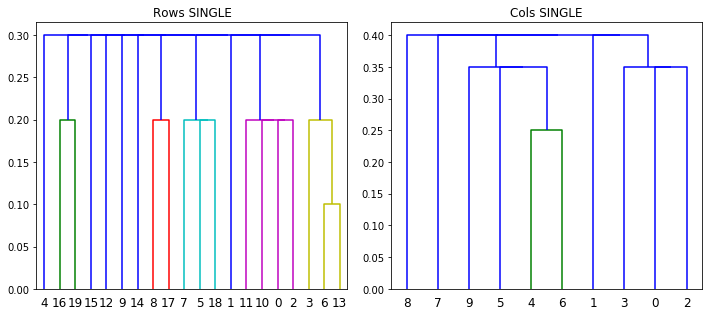

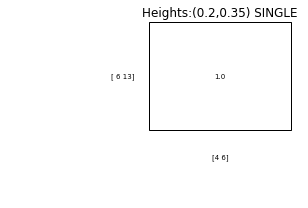

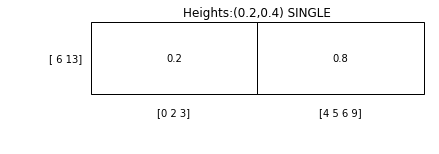

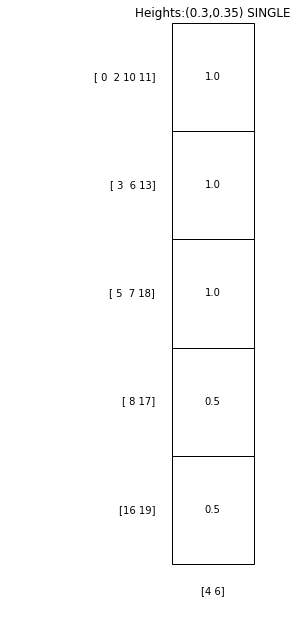

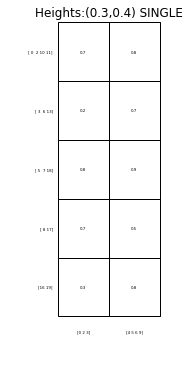

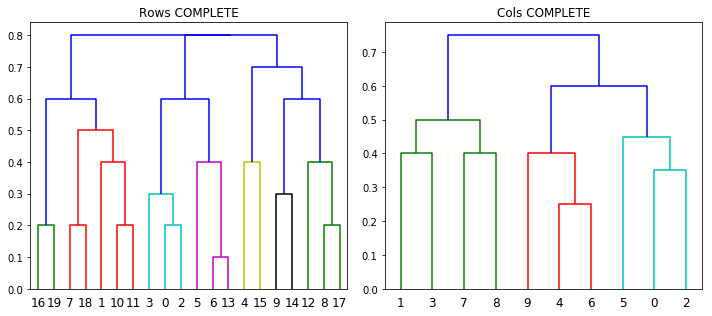

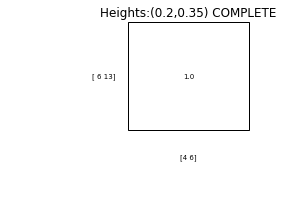

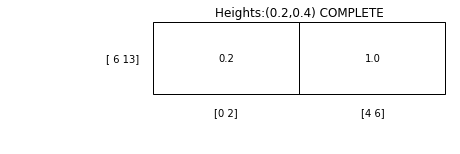

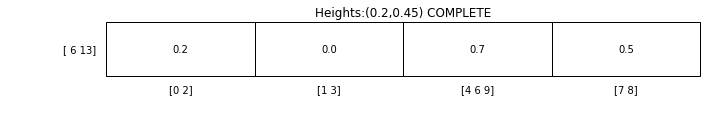

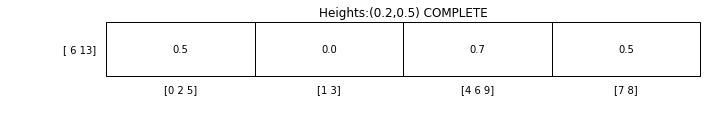

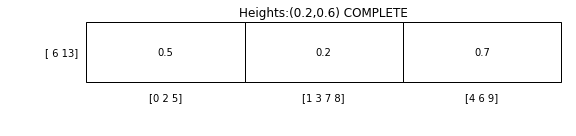

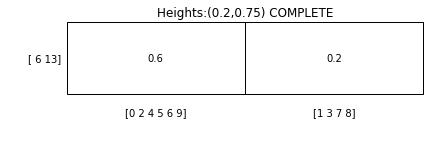

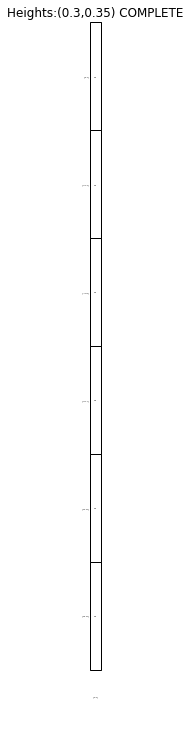

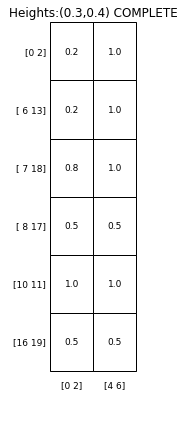

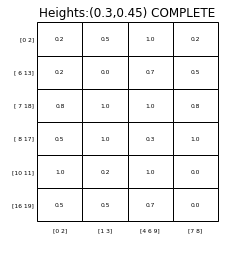

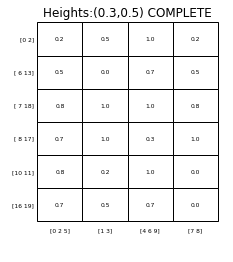

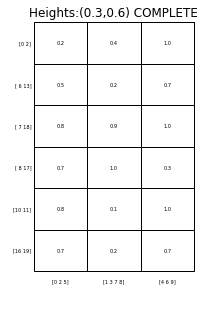

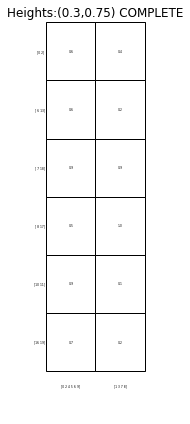

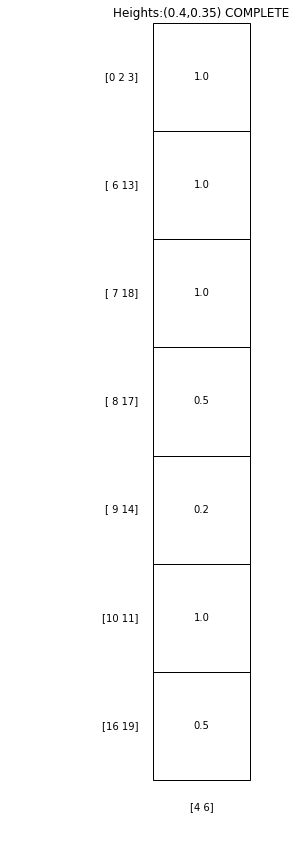

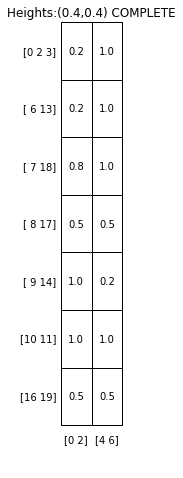

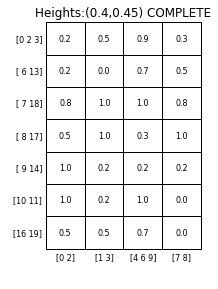

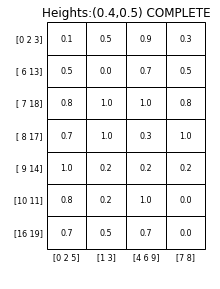

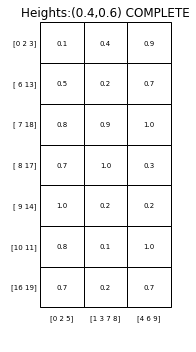

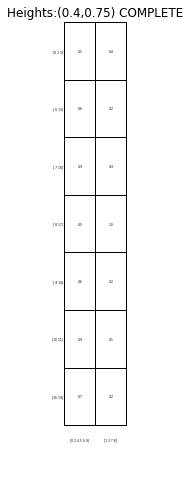

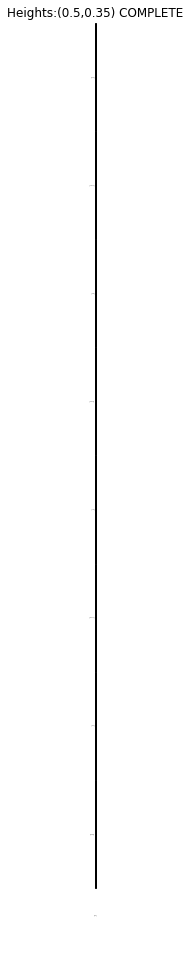

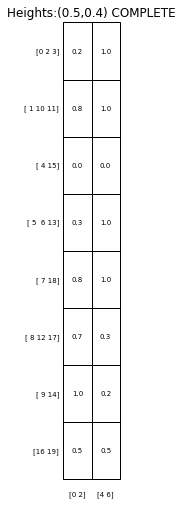

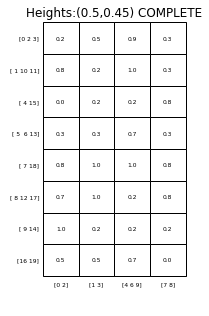

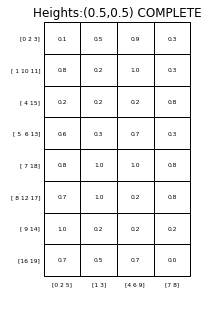

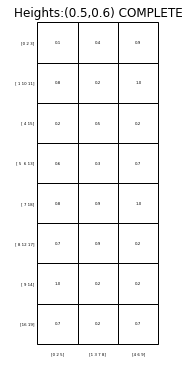

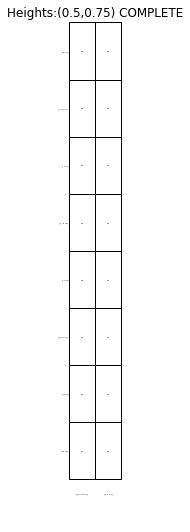

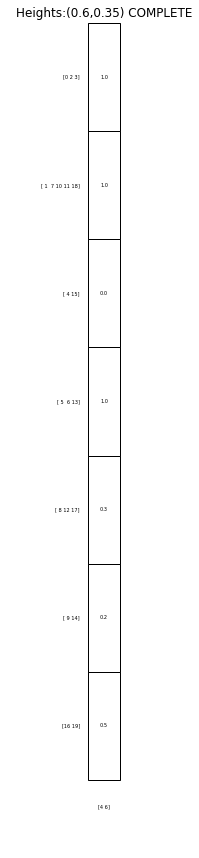

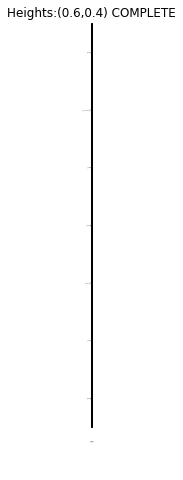

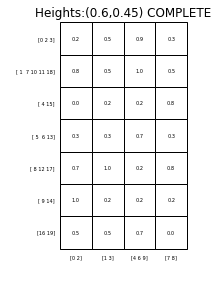

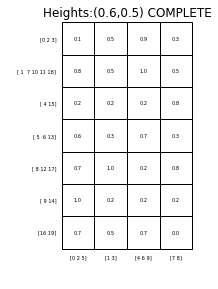

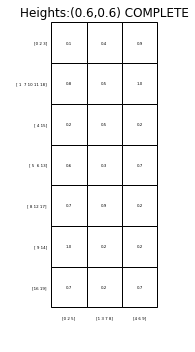

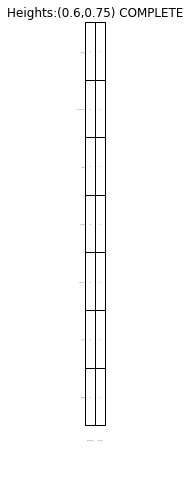

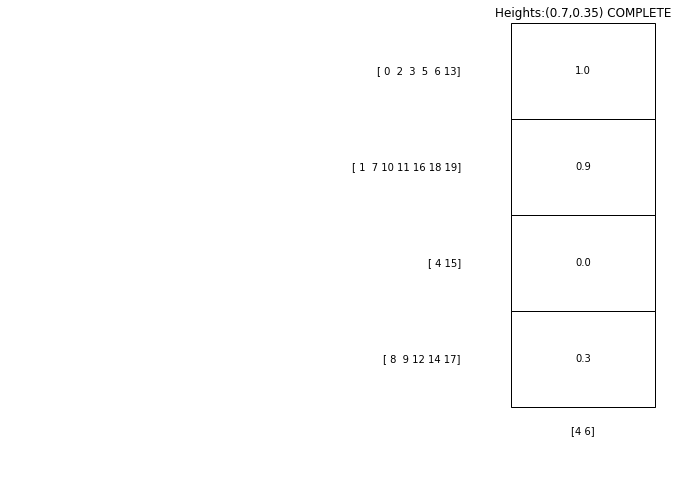

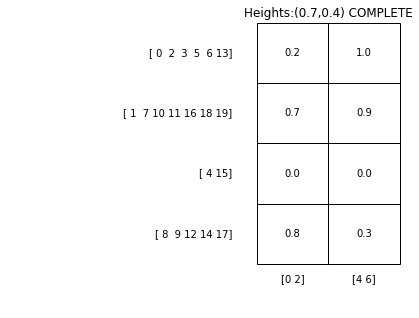

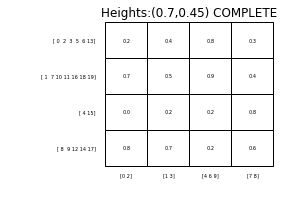

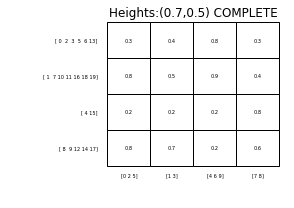

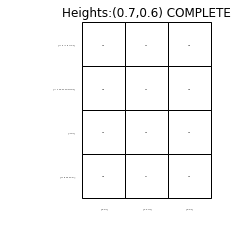

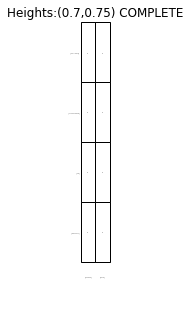

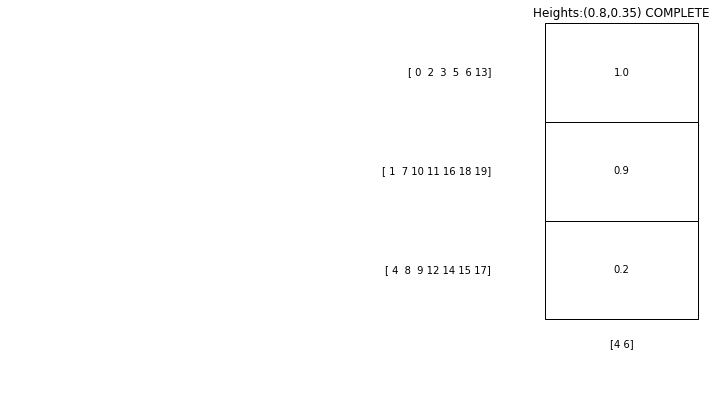

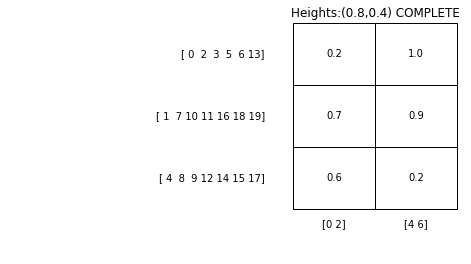

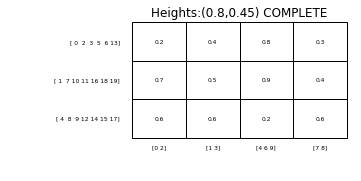

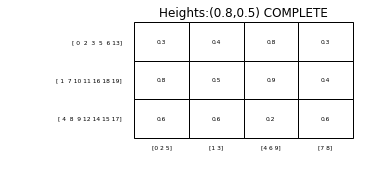

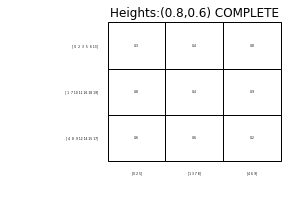

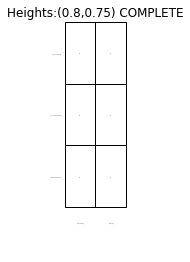

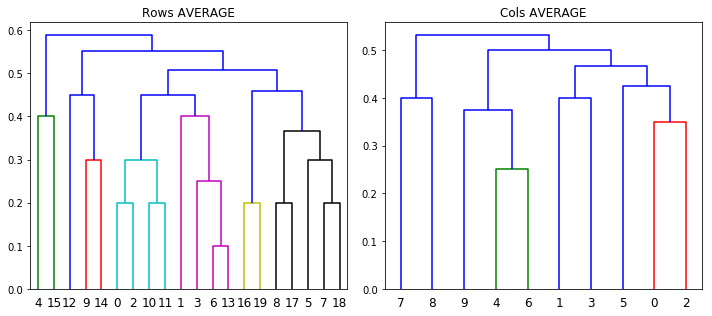

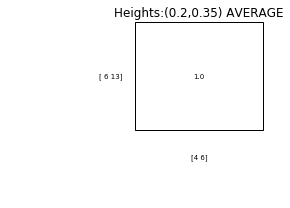

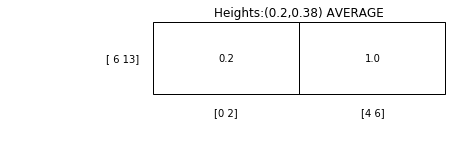

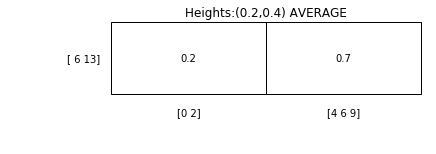

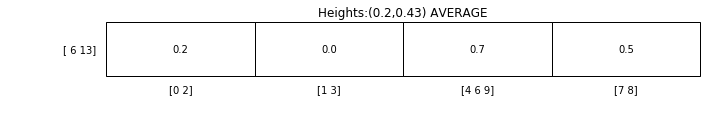

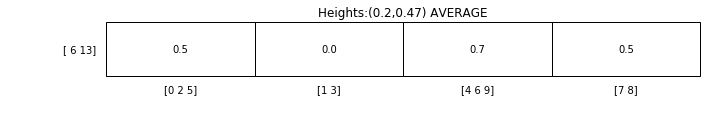

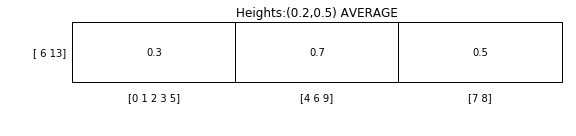

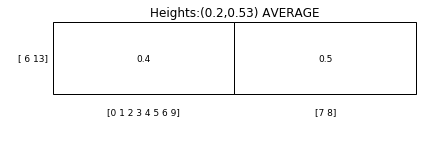

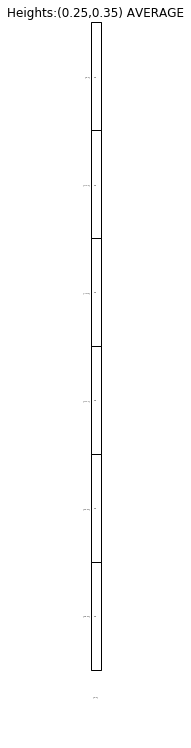

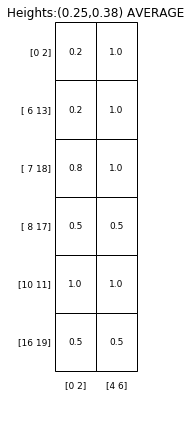

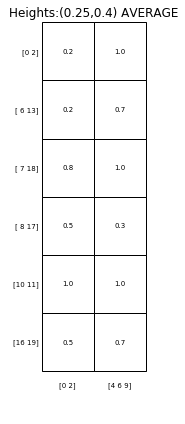

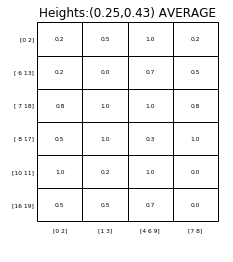

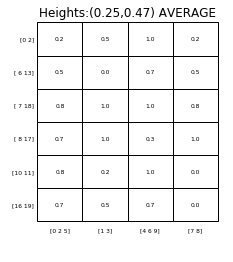

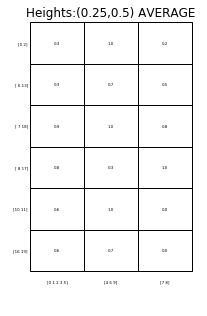

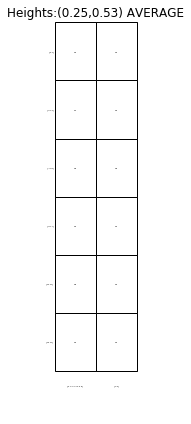

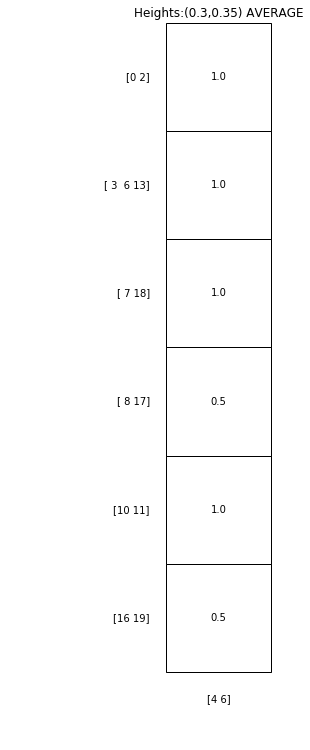

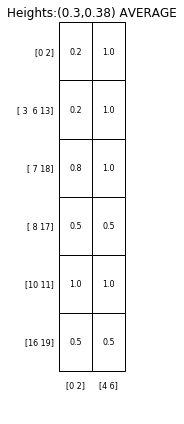

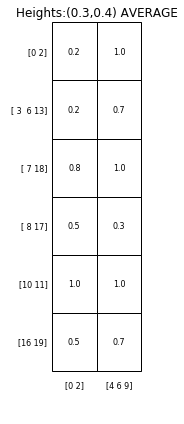

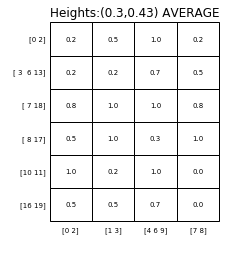

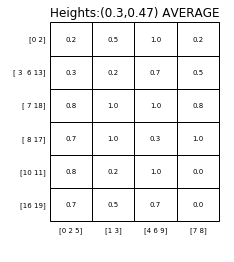

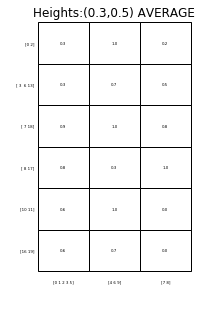

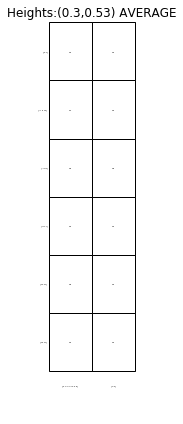

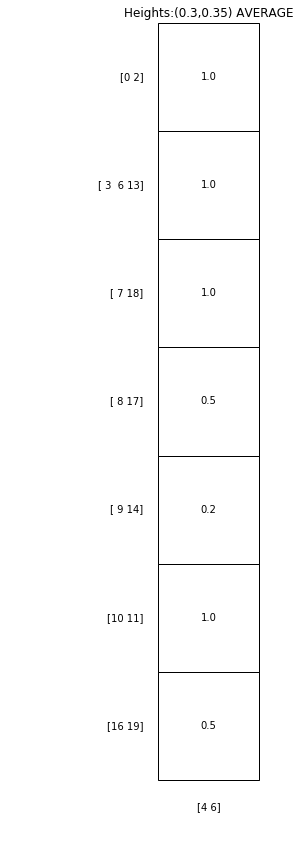

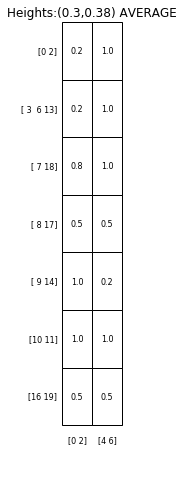

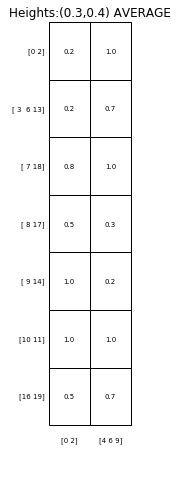

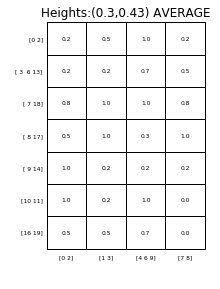

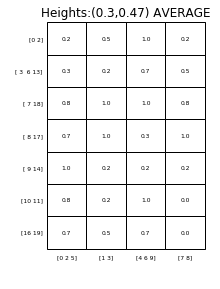

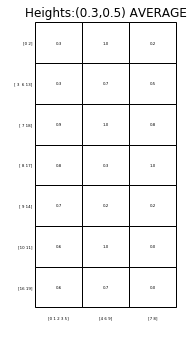

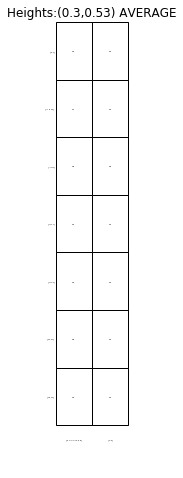

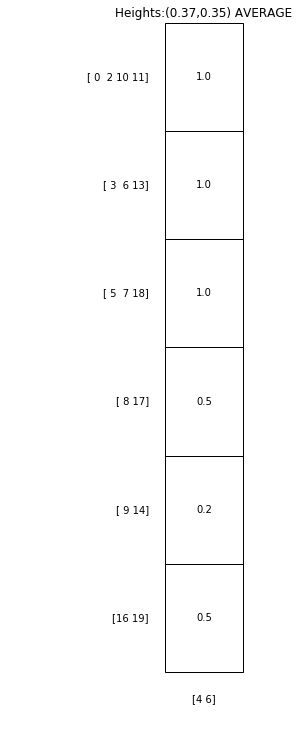

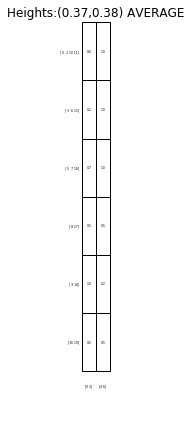

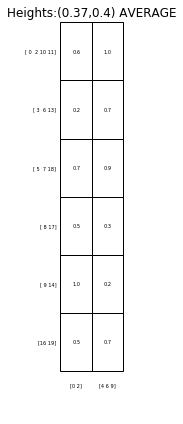

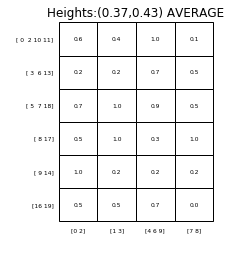

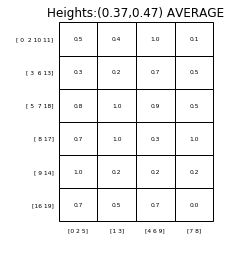

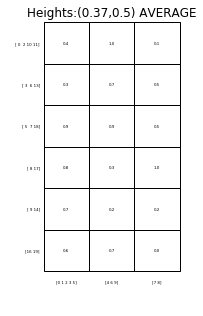

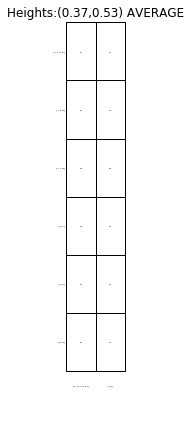

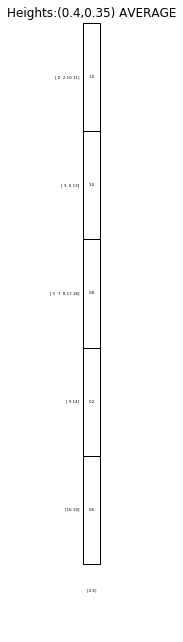

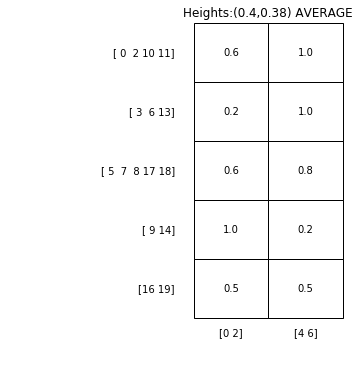

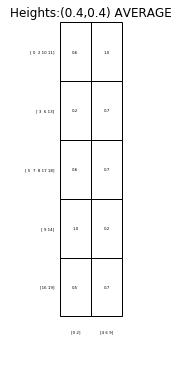

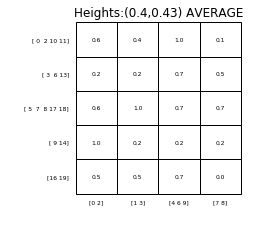

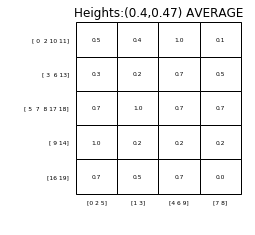

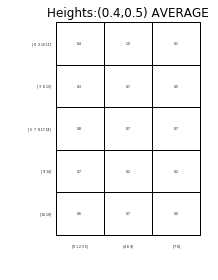

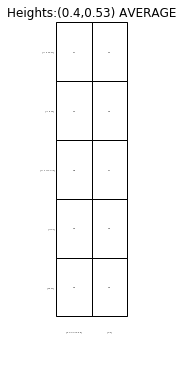

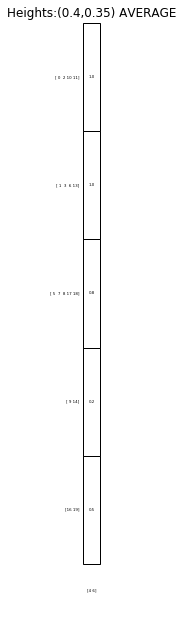

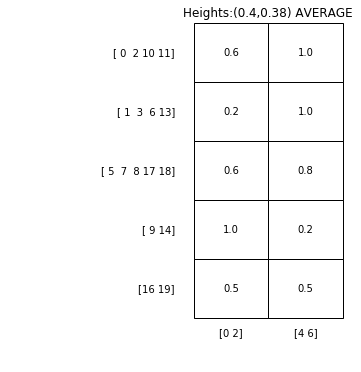

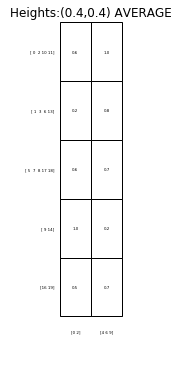

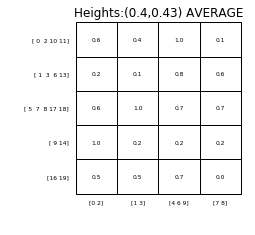

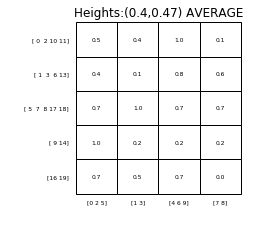

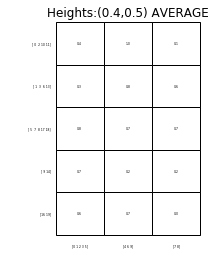

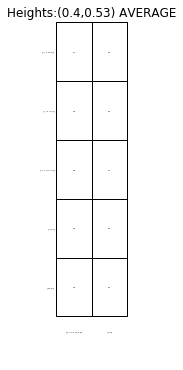

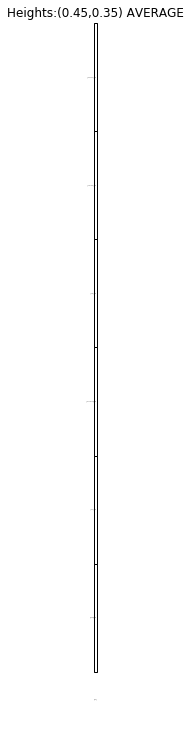

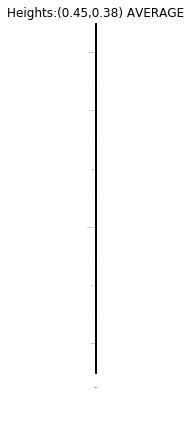

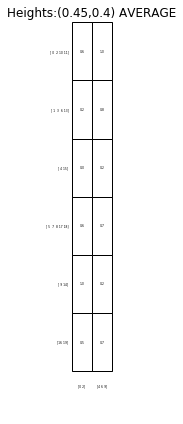

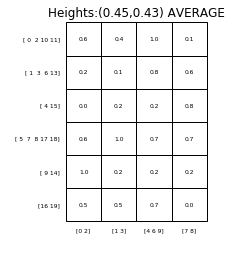

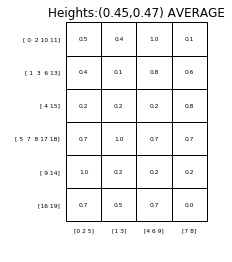

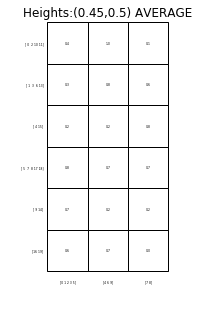

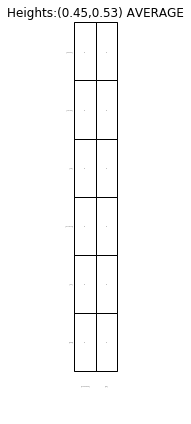

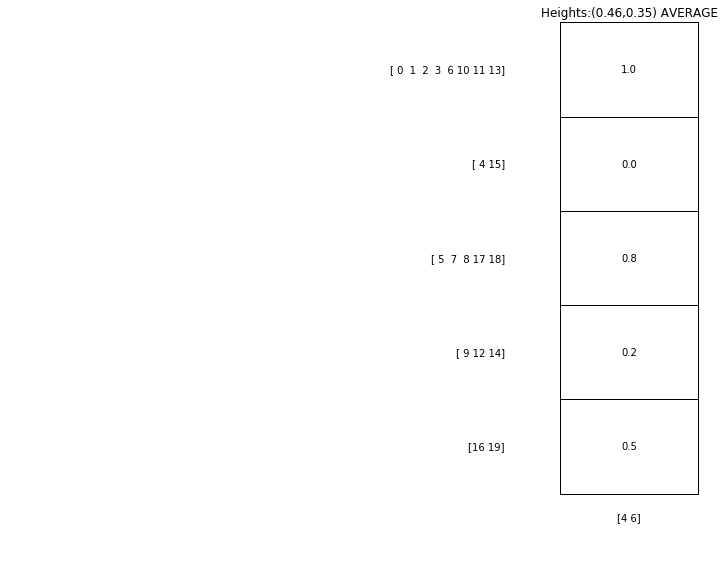

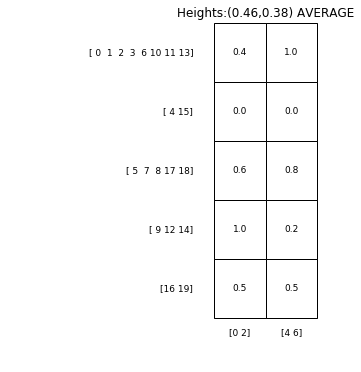

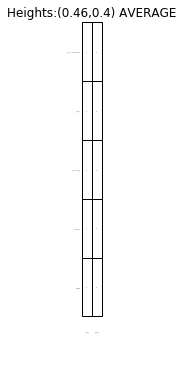

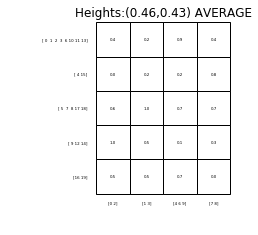

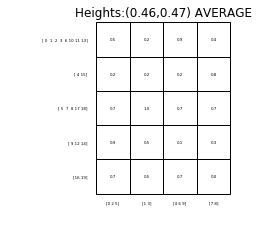

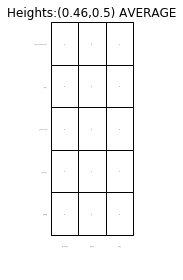

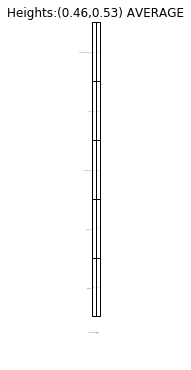

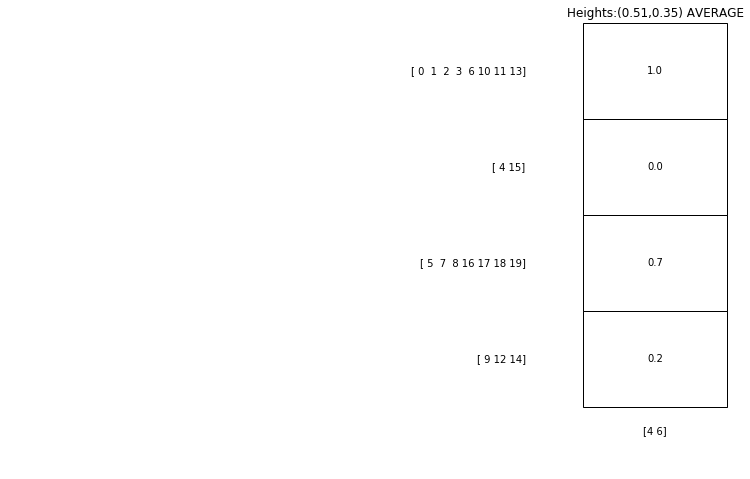

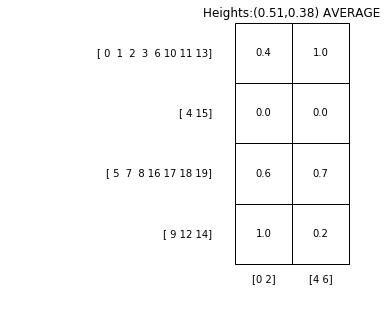

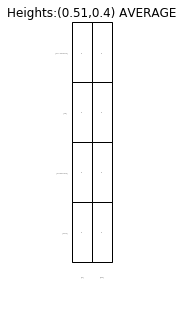

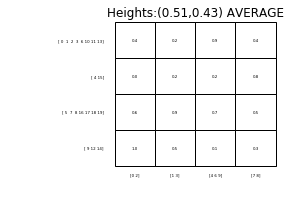

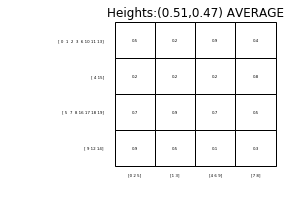

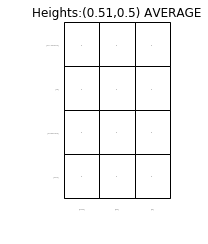

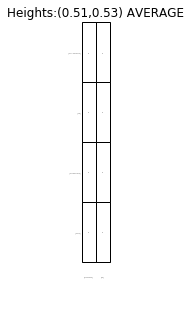

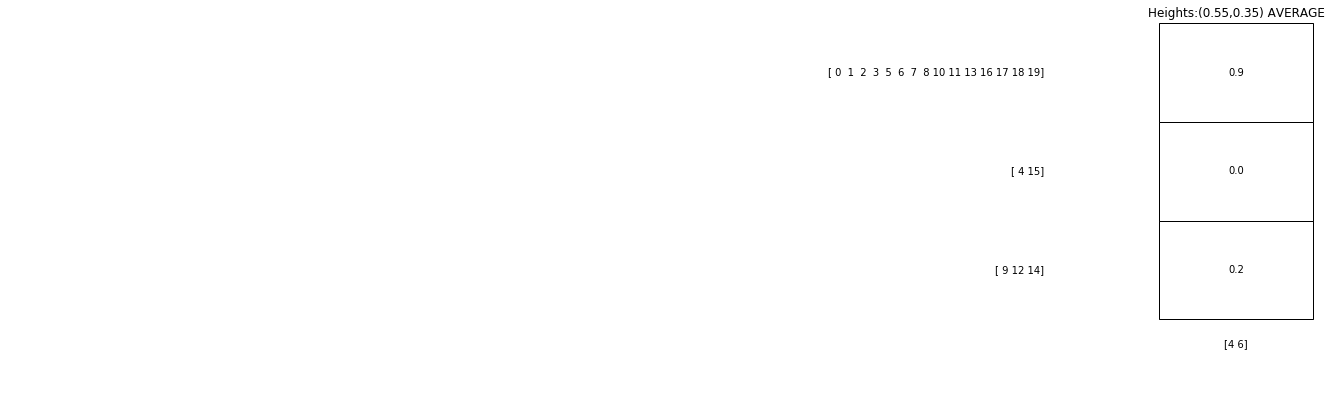

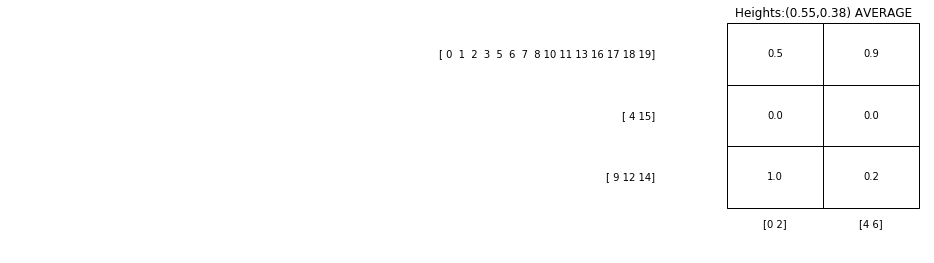

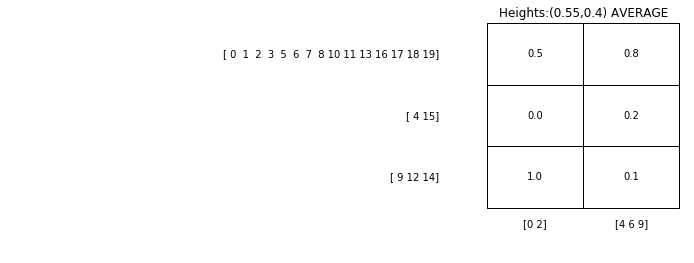

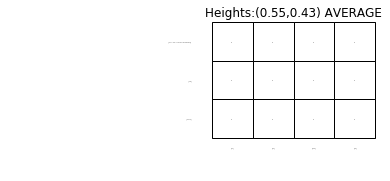

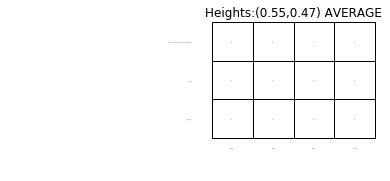

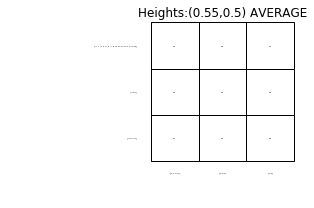

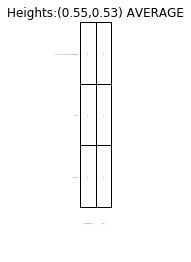

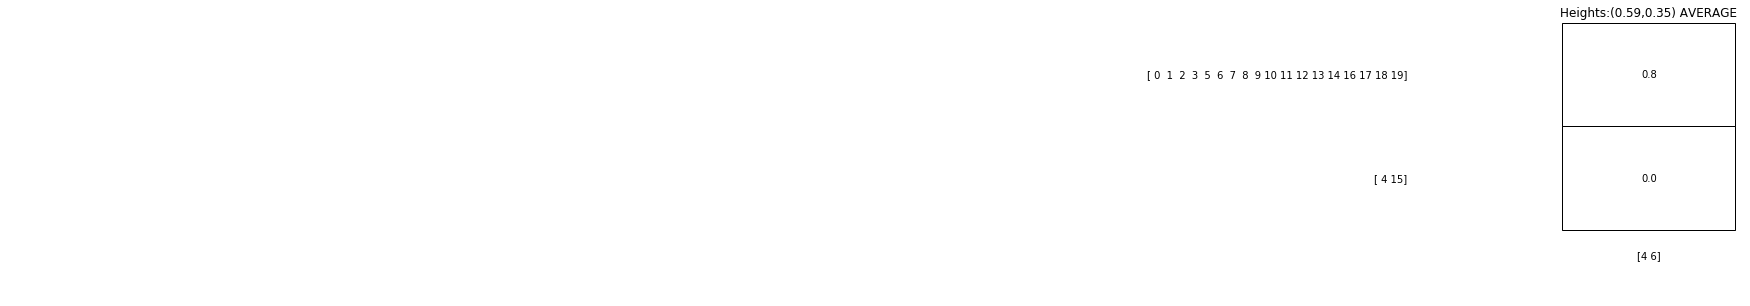

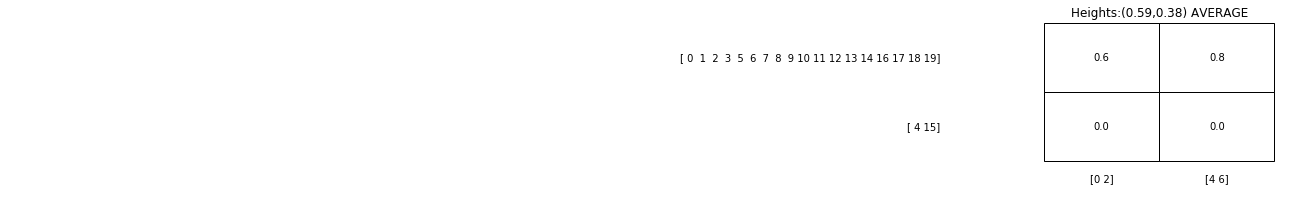

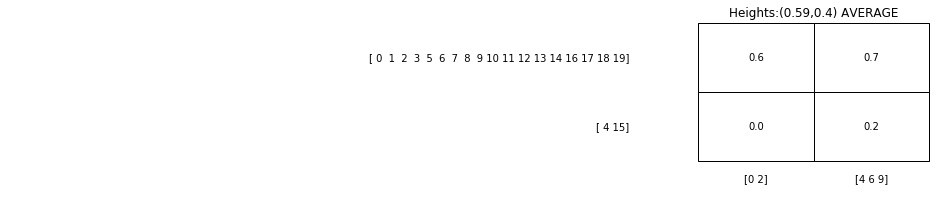

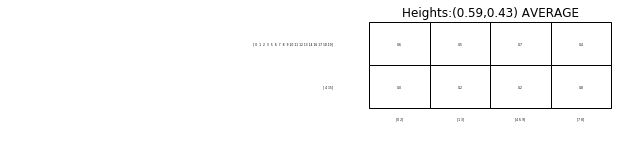

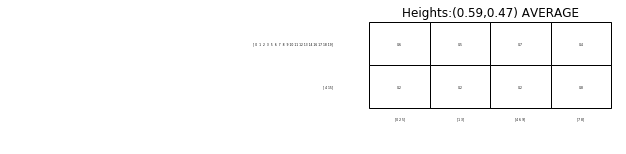

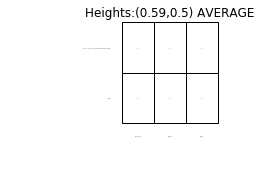

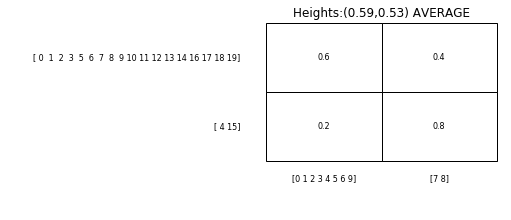

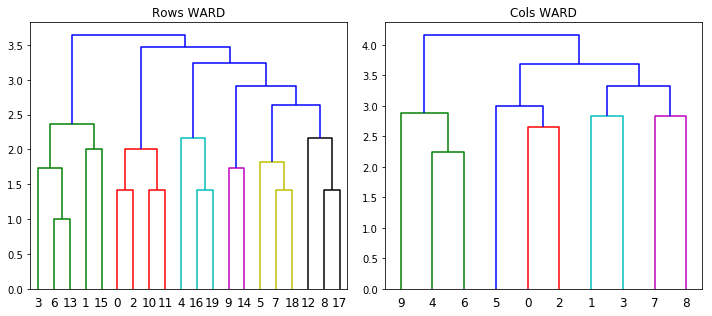

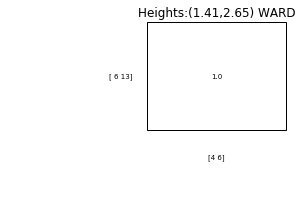

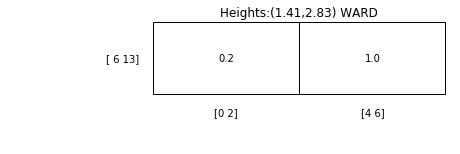

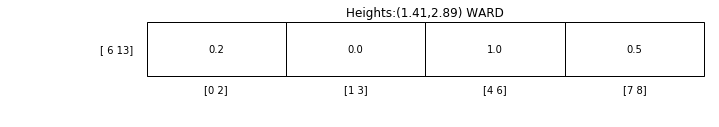

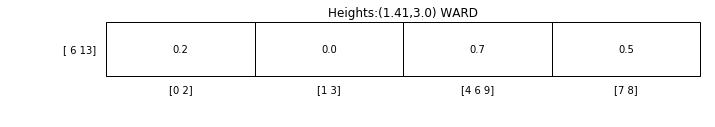

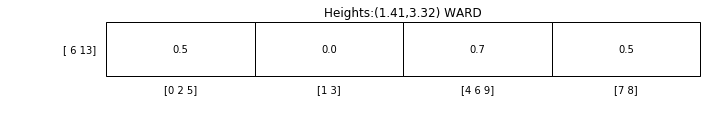

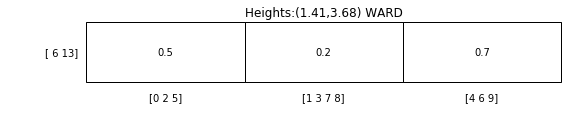

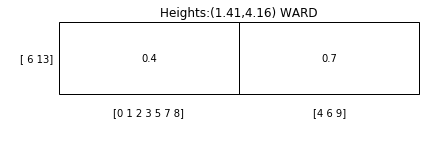

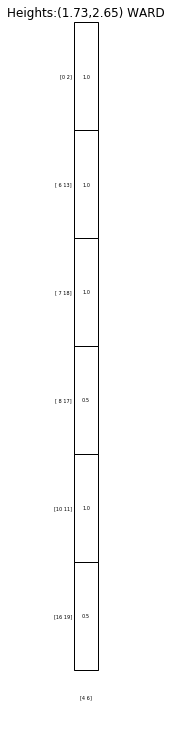

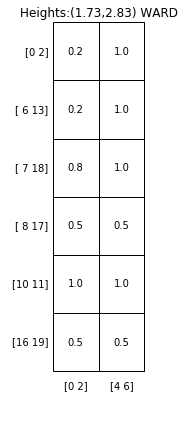

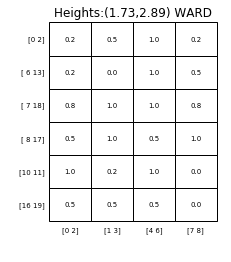

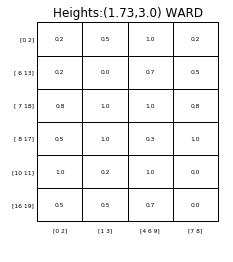

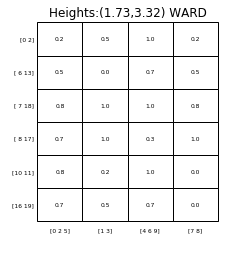

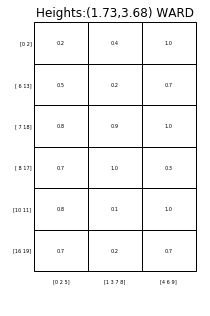

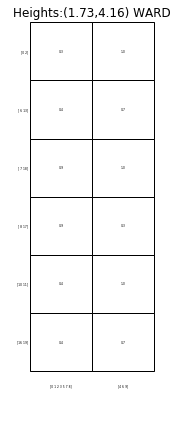

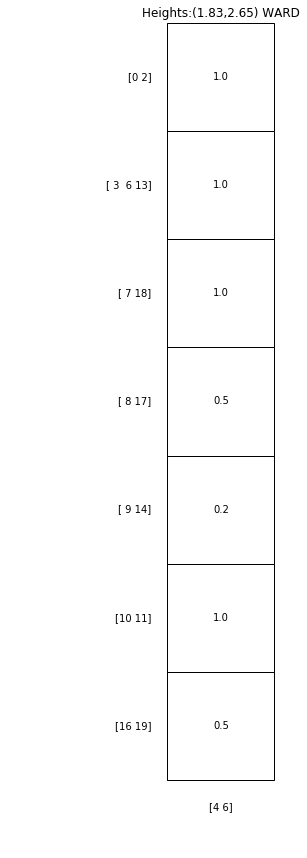

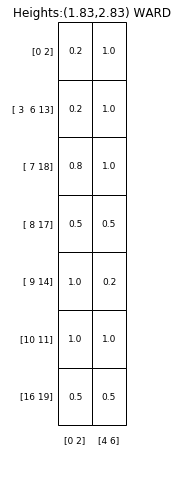

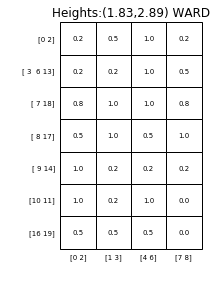

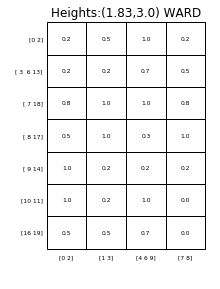

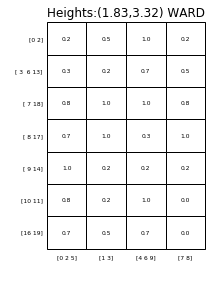

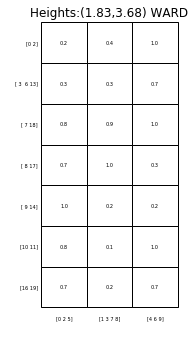

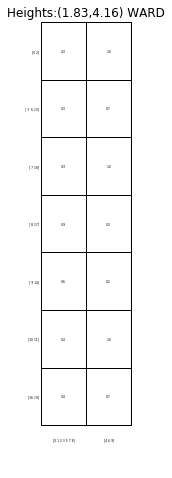

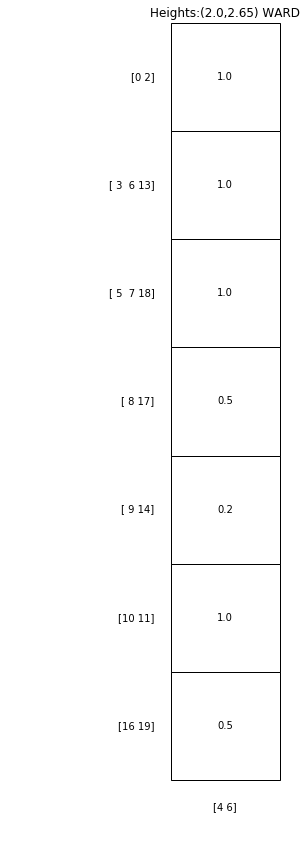

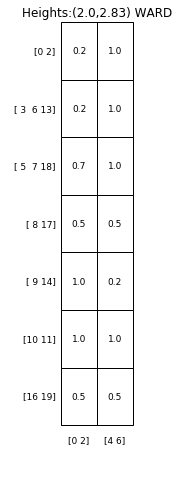

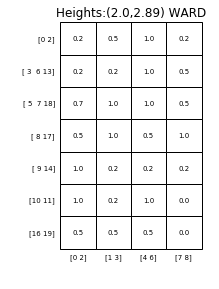

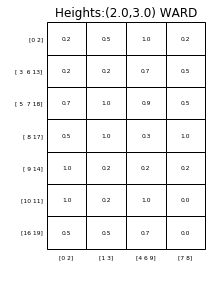

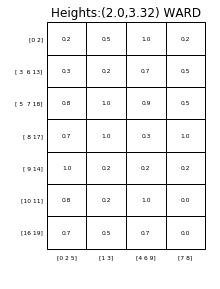

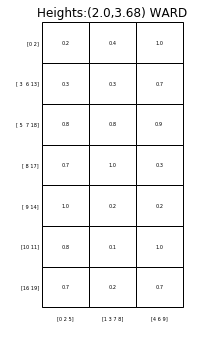

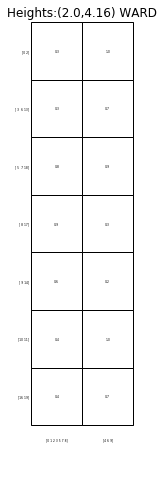

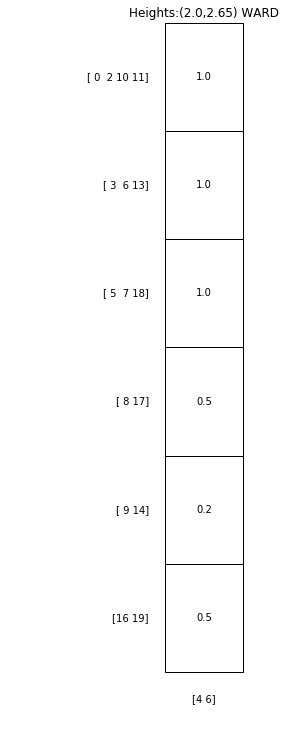

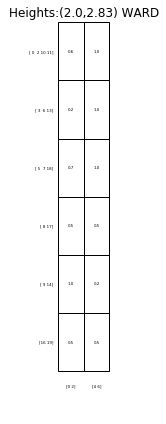

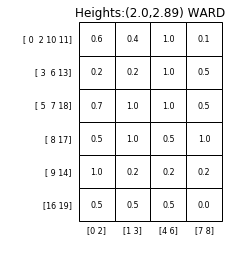

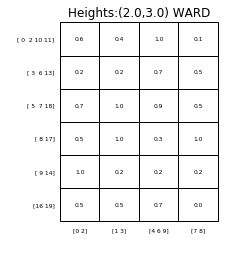

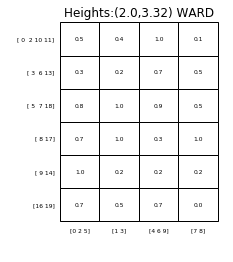

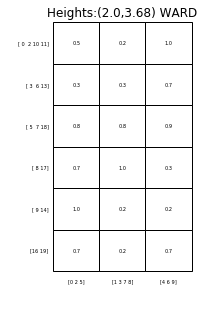

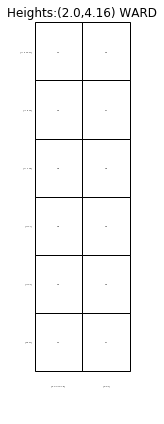

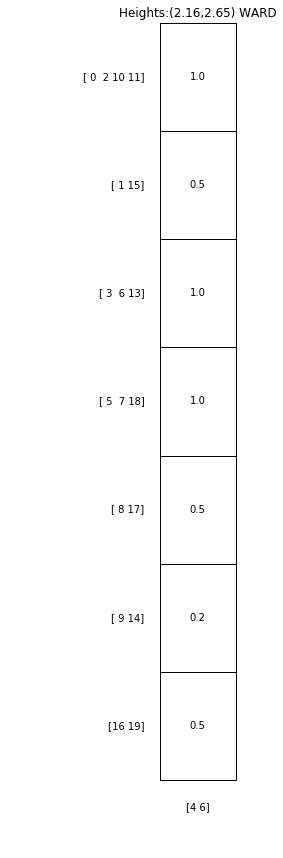

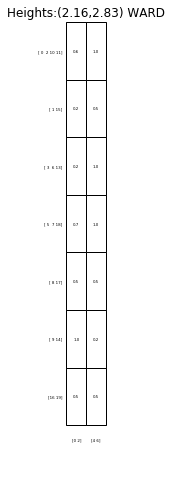

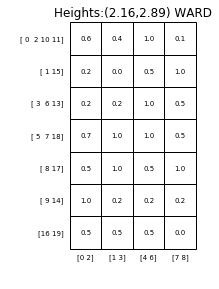

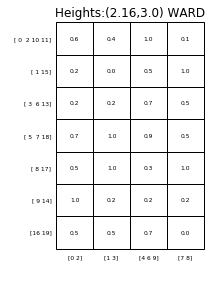

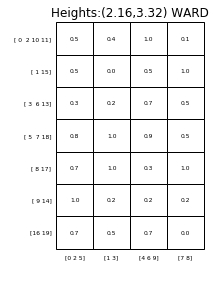

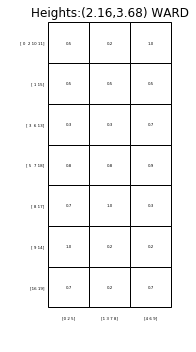

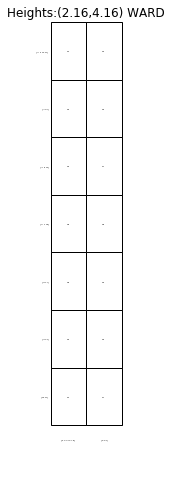

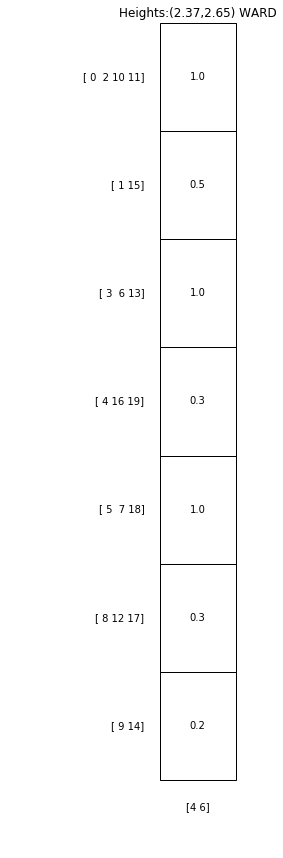

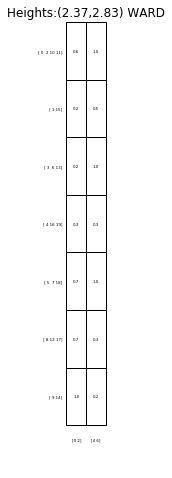

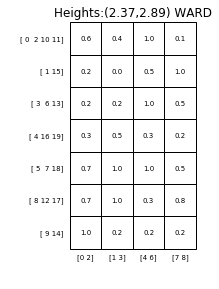

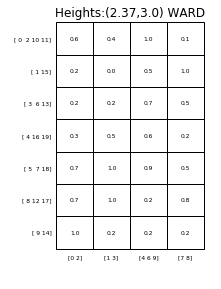

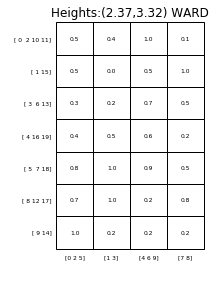

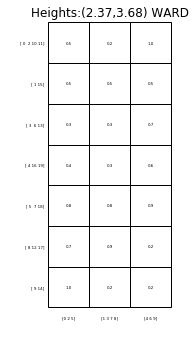

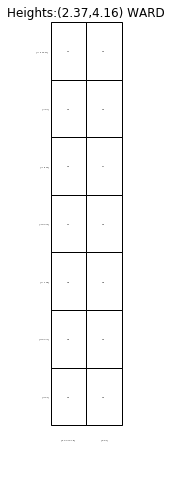

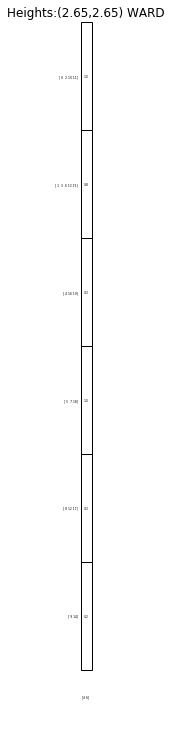

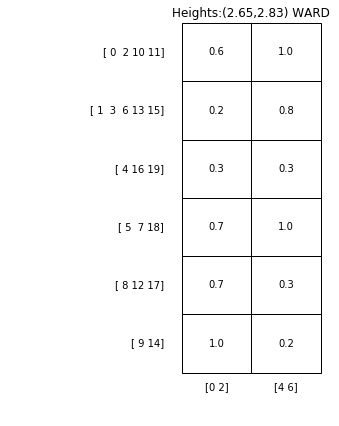

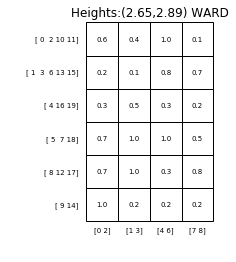

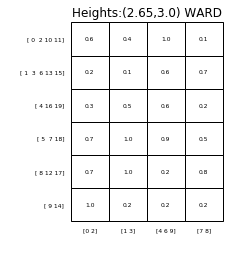

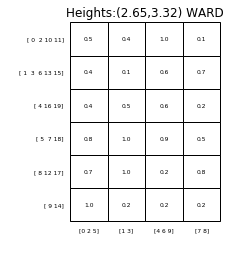

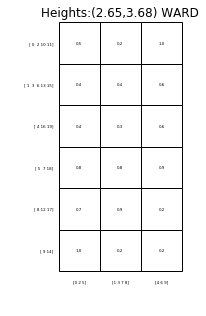

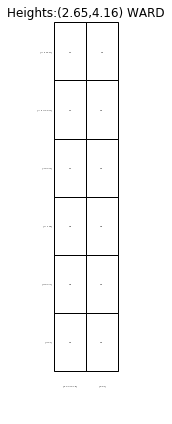

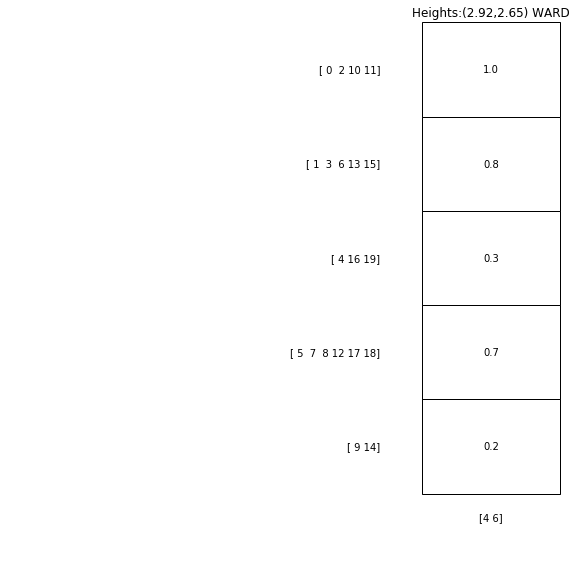

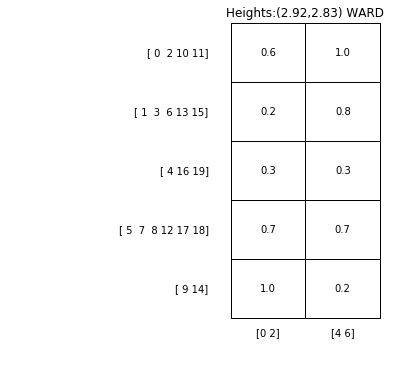

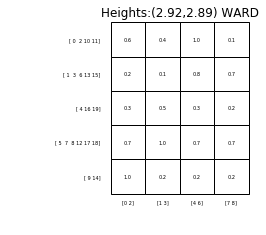

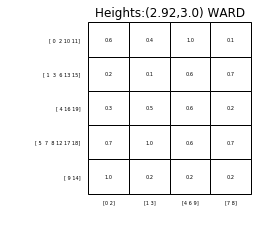

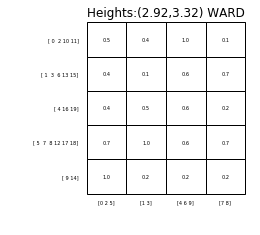

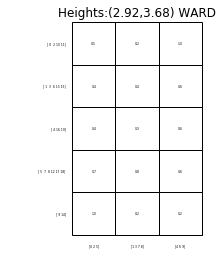

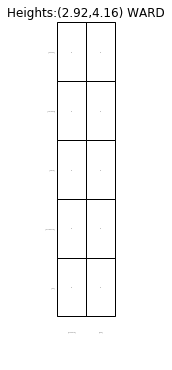

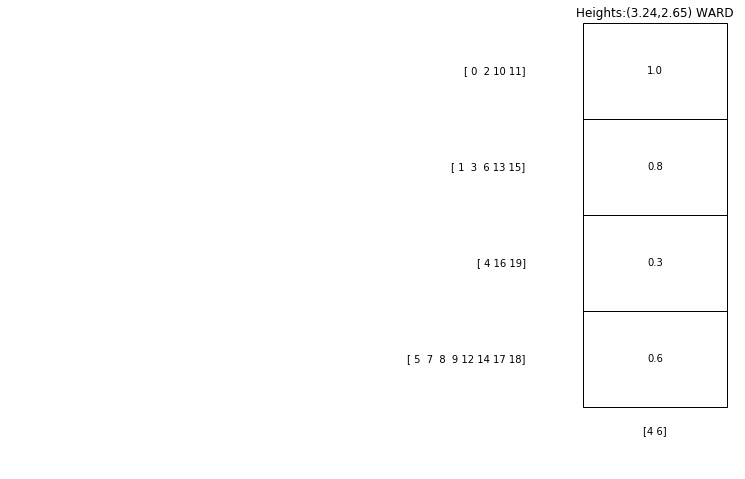

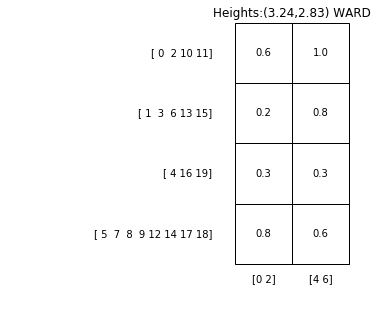

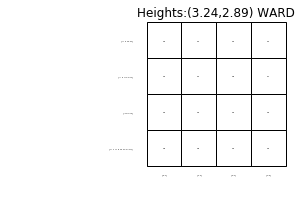

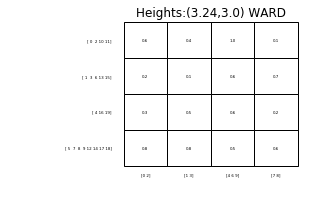

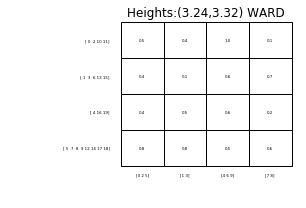

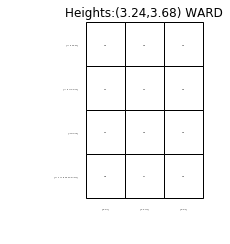

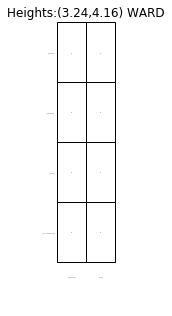

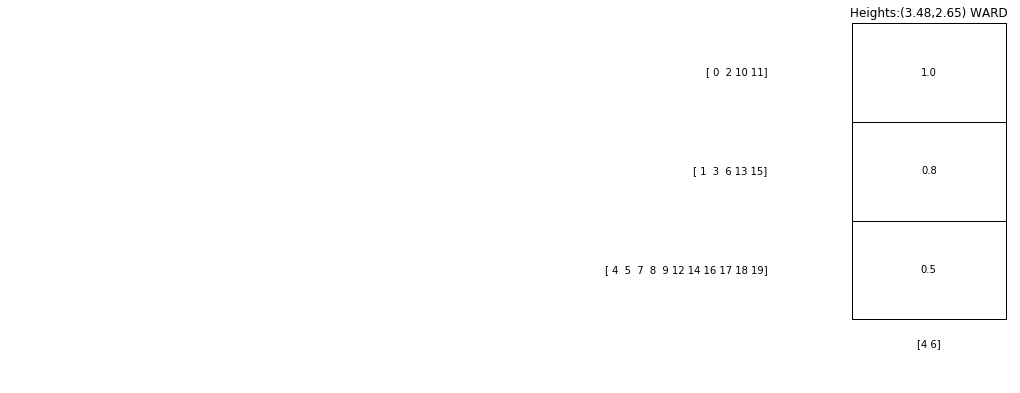

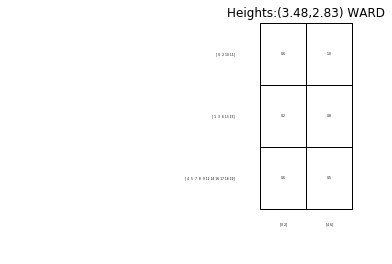

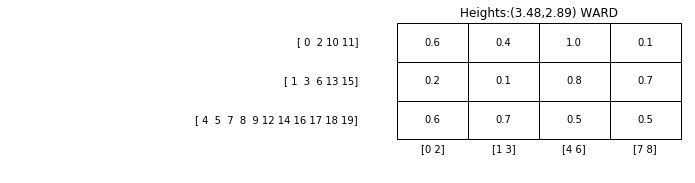

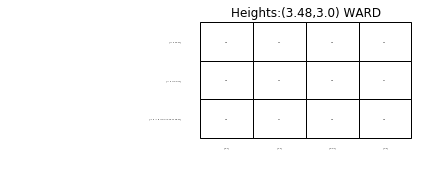

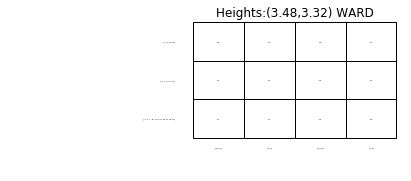

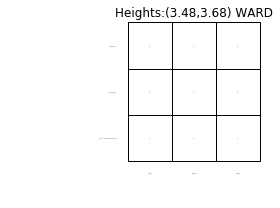

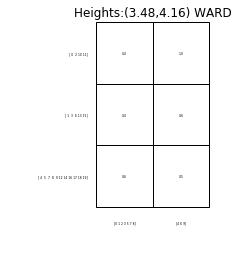

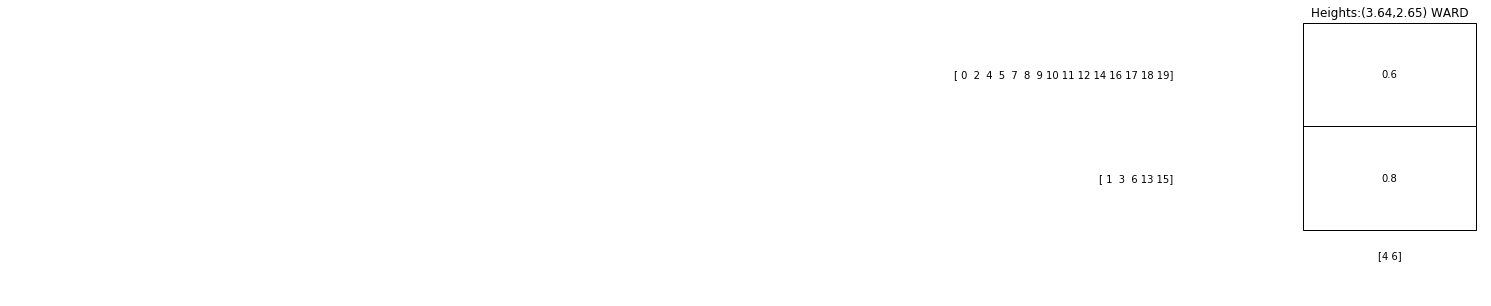

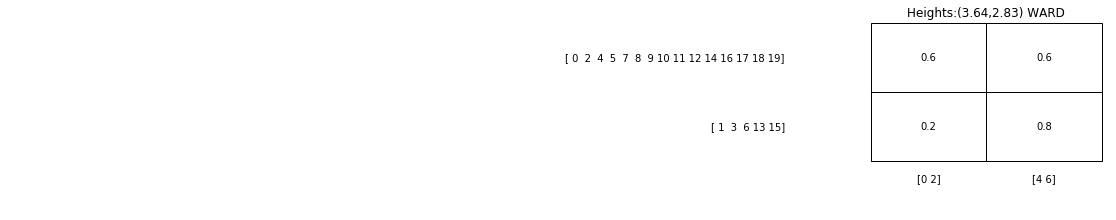

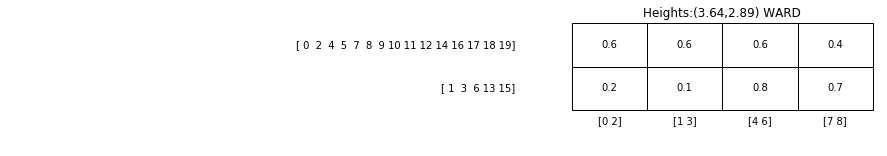

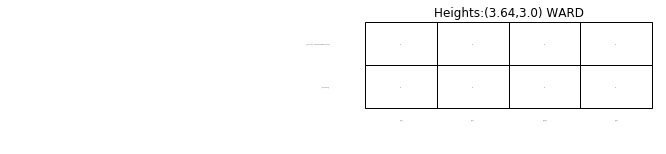

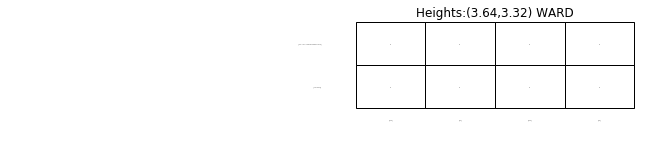

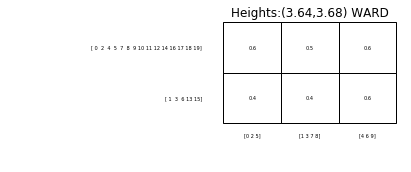

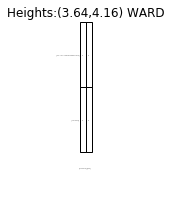

In [46]:
from scipy.cluster.hierarchy import *
from matplotlib.table import Table
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

methods = {'single':'hamming',
           'complete':'hamming',
           'average':'hamming',
           'ward':'euclidean' }


if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('imagesMR'):
    os.makedirs('imagesMR')

    
    
def checkerboard_plot(ary, ax, title="hello",
                      cell_colors=('white', 'white'),
                      font_colors=('black', 'black'),
                      fmt='%.1f',
                      row_labels=None,
                      col_labels=None,
                      fontsize=None):

    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    n_rows, n_cols = ary.shape

    if row_labels is None:
        row_labels = np.arange(n_rows)
    if col_labels is None:
        col_labels = np.arange(n_cols)

    width, height = 1.0 / n_cols, 1.0 / n_rows
    
    maxR, maxC = 0, 0
    for row in row_labels:
        if len(row) > maxR:
            maxR = len(row)
    for col in col_labels:
        if len(col) > maxC:
            maxC = len(col)
            

    for (row_idx, col_idx), cell_val in np.ndenumerate(ary):

        idx = (col_idx + row_idx) % 2
        tb.add_cell(row_idx, col_idx, width*maxC/3, height,
                    text=fmt % cell_val,
                    loc='center',
                    facecolor=cell_colors[idx])

    for row_idx, label in enumerate(row_labels):
        tb.add_cell(row_idx, -1,
                    width*maxR/3, height,
                    text=label, loc='right',
                    edgecolor='none', facecolor='none')

    for col_idx, label in enumerate(col_labels):
        tb.add_cell(len(row_labels)+1, col_idx,
                    width*maxC/3, height / 2.,
                    text=label, loc='center',
                    edgecolor='none', facecolor='none')

    for (row_idx, col_idx), cell_val in np.ndenumerate(ary):
        idx = (col_idx + row_idx) % 2
        tb._cells[(row_idx, col_idx)]._text.set_color(font_colors[idx])

    ax.add_table(tb)
    tb.set_fontsize(fontsize)
    
    ax.set_title(title)





def getClus(Z, dis):
    cutree = cut_tree(Z, height=dis)
    labels = np.unique(cutree)
    clus = []
    for label in labels:
        temp = np.where(cutree == label)[0]
        if len(temp) > 1:
            clus.append(temp)
    return clus
    

def plot_clusters(mat,method, metric):
    plt.rcParams.update({'figure.autolayout': True})
    if not os.path.exists(f'imagesMR/clusRatio{str.upper(method)}'):
        os.makedirs(f'imagesMR/clusRatio{str.upper(method)}')
    
    ZR = linkage(mat,method, metric)
    ZC = linkage(np.transpose(mat),method, metric)
    
    fig_den, ax_den = plt.subplots(ncols=2,figsize=(10,4.5))
    dendrogram(ZR, ax=ax_den[0] )
    ax_den[0].set_title(f'Rows {str.upper(method)}')
    dendrogram(ZC, ax=ax_den[1] )
    ax_den[1].set_title(f'Cols {str.upper(method)}')
    fig_den.savefig(f'imagesMR/dendrogram{str.upper(method)}.pdf')

    
    
    disR = np.unique(ZR[:,2]).tolist()
    disC = np.unique(ZC[:,2]).tolist()
    
    clusR = []
    clusC = []
    for disr in disR:
        clusr = getClus(ZR, disr)
        if len(clusr) > 0:
            clusR.append([clusr, round(disr,2)])
    #         clusR[round(disr,2)] = clusr
    for disc in disC:
        clusc = getClus(ZC, disc)
        if len(clusc) > 0:
            clusC.append([clusc, round(disc,2)])
    #         clusC[round(disc,2)] = clusc

    
#     total = len(clusR)*len(clusC)
#     num_axs = 4
#     num_cols = 1
#     num_fig = total//num_axs + 1

            
    figs,axs = [],[] 
#     figsize=(4, 4)
#     for i in range(0,num_fig):
#         fig,ax = plt.subplots(nrows= num_axs,figsize=figsize)
# #         fig.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
#         figs.append(fig)
#         axs.append(ax)
    k = 0
    for hr in clusR:
        for hc in clusC:
            i= 0
            ck = np.empty((len(hr[0]),len(hc[0])),dtype='float')
            for clus_r in hr[0]:
                j = 0
                for clus_c in hc[0]:  
                    submat = mat[clus_r][:,clus_c]                    
                    count = np.count_nonzero(submat==0)
                    ratio = 1- float(count) / float(submat.size)
                    ck[i][j] = ratio
                    j += 1
                i += 1
            
            
            figsize=(2*(i+j)/i,1.5*(i+j)/j)
            fig,ax = plt.subplots(figsize=figsize)

            checkerboard_plot(ck, ax,
                              title=f'Heights:({hr[1]},{hc[1]}) {str.upper(method)}',
                              col_labels=hc[0],
                              row_labels=hr[0], )
            k+=1
            fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

            fig.savefig(f'imagesMR/clusRatio{str.upper(method)}/{k}.pdf')
            figs.append(fig)
            axs.append(ax) 

    from matplotlib.backends.backend_pdf import PdfPages
    
    
    with PdfPages(f'imagesMR/clusRatio{str.upper(method)}.pdf') as pdf:
  # As many times as you like, create a figure fig and save it:
     
        for fig in figs:
            pdf.savefig(fig)
            
            

#     fig.savefig(f'imagesMR/clusRatio{str.upper(method)}.pdf')
                    
                
mat = np.load('data/matrix.npy')

methods = {'single':'hamming',
           'complete':'hamming',
           'average':'hamming',
           'ward':'euclidean' }     
for method, metric in methods.items():
    plot_clusters(mat,method, metric)


    
